## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

#### Business problem overview:
- In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In [1]:
# Importing Numpy and Pandas packages
import numpy as np
import pandas as pd
# Setting Max column limit
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data pre-processing packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Importing metrics
from sklearn import metrics
from sklearn import preprocessing

# Importing evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report, average_precision_score, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

# Importing time
import time

## Exploratory data analysis

In [2]:
# Importing data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Observe the different feature type present in the data

In [3]:
# Checking the shape of the dataframe
df.shape

(284807, 31)

In [4]:
# Checking the description of the dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Checlking the data types for each column
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
# Checlking other info for each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking missing values in the dataframe

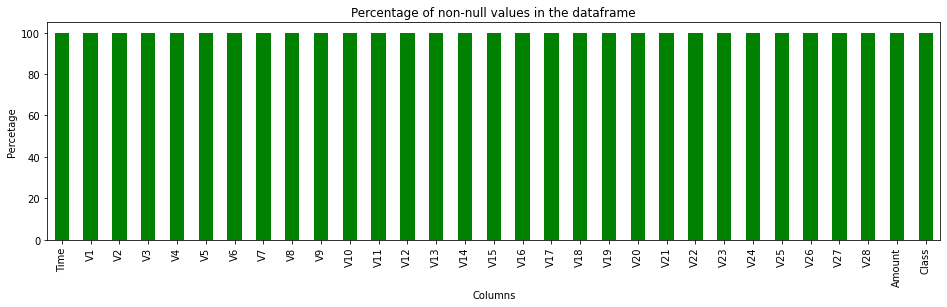

In [7]:
plt.figure(figsize=[16,4])
((df.notnull().sum()/df.count())*100).plot.bar(color='Green').set_title('Percentage of non-null values in the dataframe')
plt.ylabel('Percetage')
plt.xlabel('Columns')
plt.show()

We can see that there are **no** missing value present in the dataframe

#### In our dataset, the columns are transformed using PCA and thus we can assume that outliers are already treated in the dataframe. So we are not doing any further outlier treatment in our dataset

#### Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [9]:
print("Percentage of Class 0 (Normal Share) in the dataframe: ", round(normal_share,2))
print("Percentage of Class 1 (Fraud Share) in the dataframe: ", round(fraud_share,2))

Percentage of Class 0 (Normal Share) in the dataframe:  99.83
Percentage of Class 1 (Fraud Share) in the dataframe:  0.17


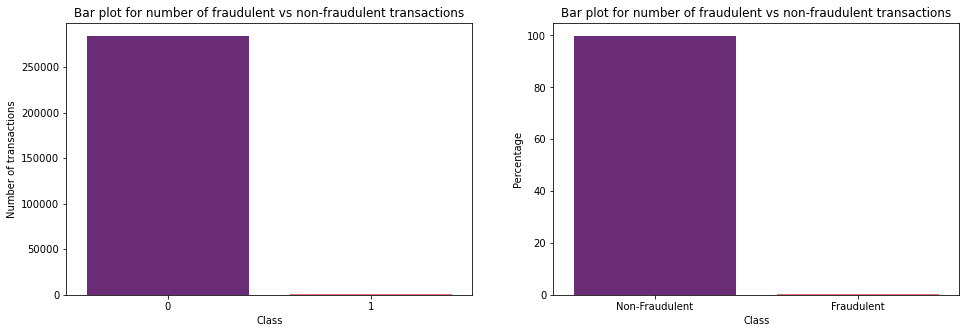

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(16,5))

# Creating bar plot (CountPlot in seabornb) for number of fraudulent vs non-fraudulent transactions
plt.subplot(1,2,1)
sns.countplot(df["Class"], palette=('magma'), )
plt.ylabel("Number of transactions")
plt.xlabel("Class")
plt.title("Bar plot for number of fraudulent vs non-fraudulent transactions")

# Creating bar plot for Percentage of fraudulent vs non-fraudulent transactions
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage, palette=('magma'))
plt.title("Bar plot for number of fraudulent vs non-fraudulent transactions")

plt.show()

#### We can see that the dataset is highly class imbalanced with 492 records (0.17%) with fraudulent transactions and 284315 records (99.83%) non-fraudulent transactions

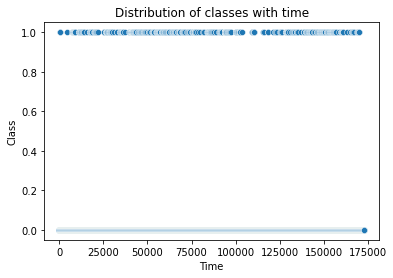

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Distribution of classes with time")
plt.show()

We can see both the fraudulent transactions and the non-fraudulent transactions have even distribution over time. So we cannot conclude any insight from the same.

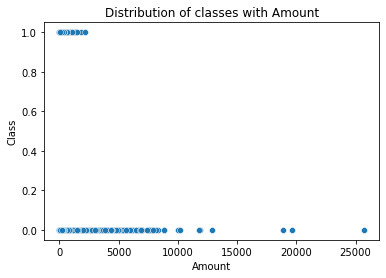

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Distribution of classes with Amount")
plt.show()

We can see low amount transactions have more fraudulent transactions(Class 1) than high amount transactions. So we can conclude that Amount has an impact on the findings for fraudulent transactions

We can see that the time column has almost no impact on the classification of fraudulent and non fraudulant transactions. So we are going to drop this column form the dataframe and proceed with further analysis and model building

In [13]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### Let us check the distribution of all the features in the dataframe using a plot for each of the features in the dataframe

<Figure size 432x288 with 0 Axes>

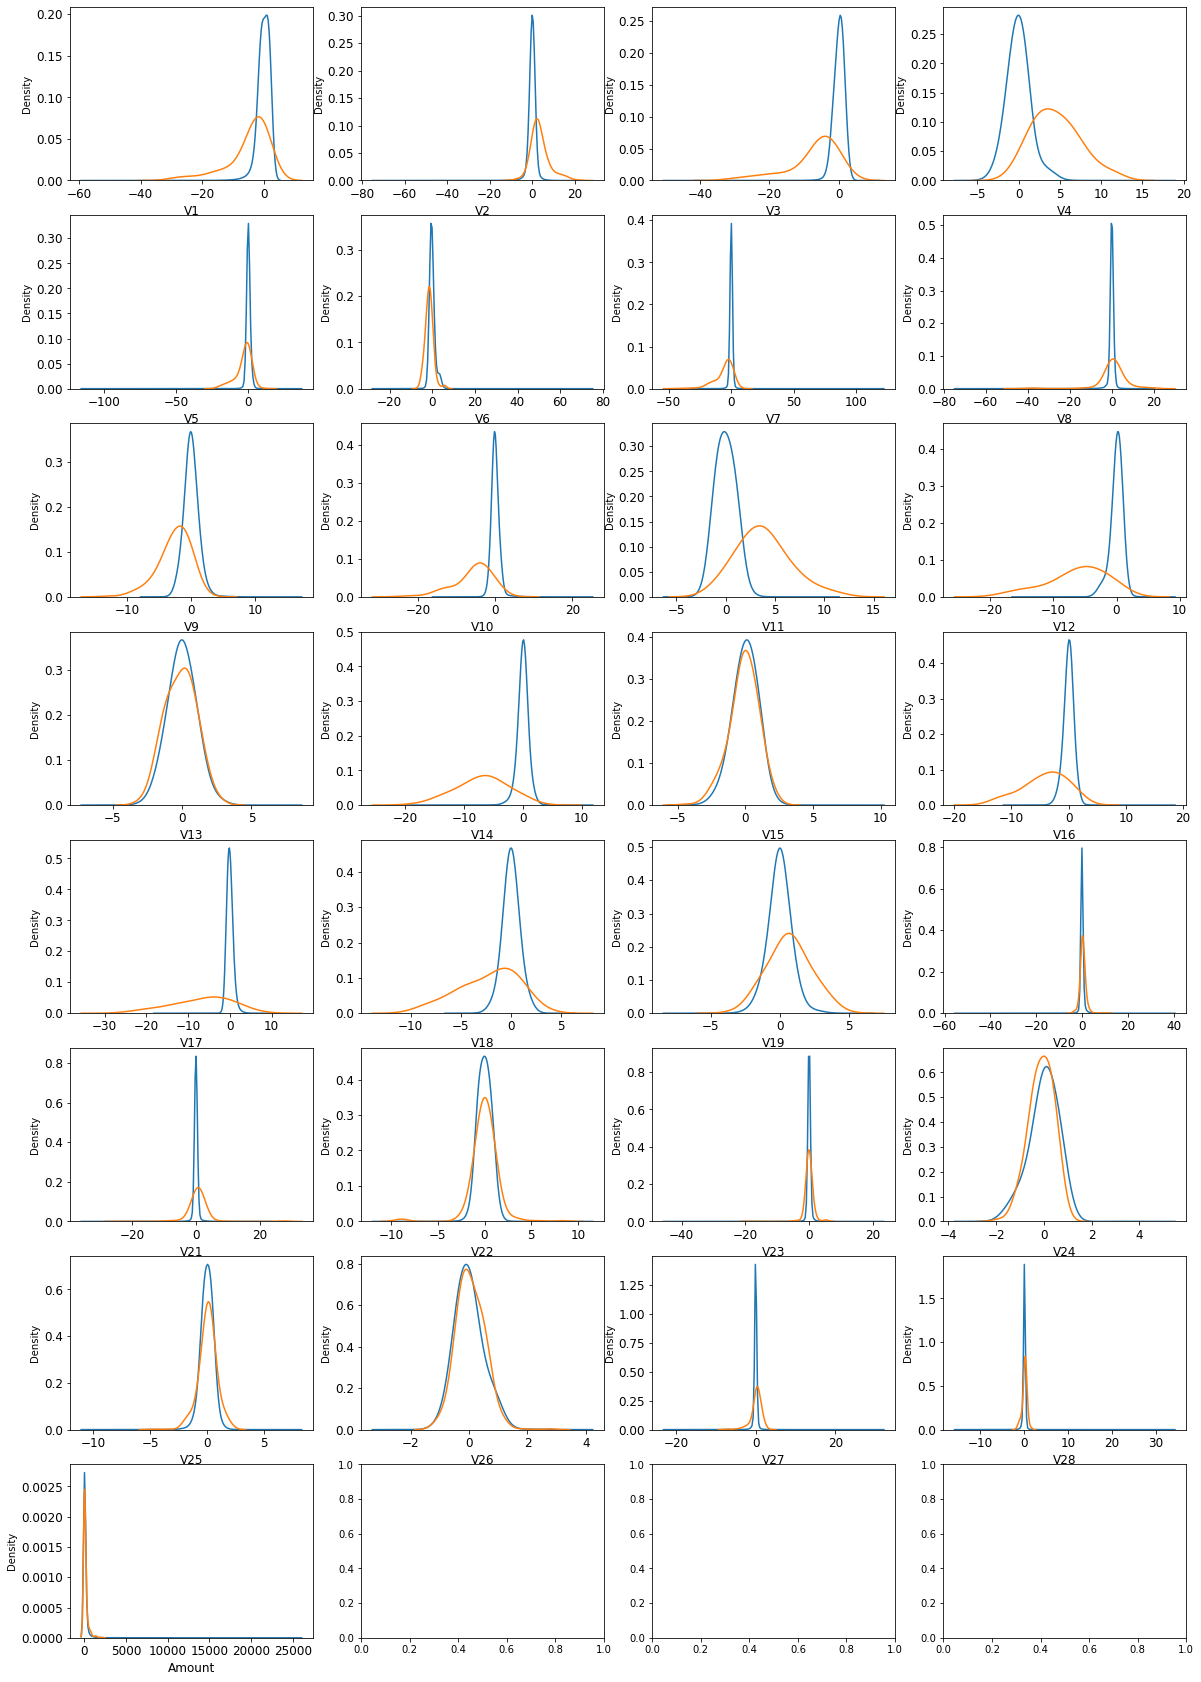

In [14]:
# Plotting all the variable in distplot to visualise the distribution
col = list(df.columns.values)
# dropping Class columns from the list
col.remove("Class")

i = 0
c0 = df.loc[df['Class'] == 0]
c1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(20,30))

for feature in col:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(c0[feature], bw=0.5, label="0")
    sns.kdeplot(c1[feature], bw=0.5, label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions

### Splitting the data into train & test data

In [15]:
y = df["Class"] #class variable
X = df.drop("Class", axis = 1) # Feature variables

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
392
100


### Feature Scaling using Standard Scaler

We need to scale Amount column

In [18]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

#### Let's have a look at the train features 

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
44828,-0.557458,1.231524,0.573268,-0.263955,0.946120,-1.203171,1.057426,-0.130107,-1.042645,-1.188775,1.736195,0.620972,0.364393,-1.354335,-0.456569,0.844043,0.505238,0.789873,-0.582198,-0.012924,0.025811,0.023363,-0.230233,0.224216,-0.088442,0.156625,0.071094,0.154123,-0.363884
221877,-0.344935,1.385742,0.686680,1.035083,0.256868,-0.460239,0.963755,-0.294085,-0.565671,-1.034799,-0.069801,0.318885,1.207708,-1.796288,1.148042,-1.171029,2.175283,0.414696,2.943103,0.385026,-0.211719,-0.288454,-0.367644,-0.007358,0.396272,0.465707,-0.002034,0.097146,-0.197146
278826,-2.638648,0.975973,0.897377,0.156363,0.096289,0.208338,-0.150398,0.298436,0.245605,0.353767,0.576273,0.555031,-0.513744,0.131441,-0.308917,0.657888,-0.804332,0.401200,-0.113686,-0.772491,-0.117961,-0.781257,-0.637791,0.722013,0.267284,-1.026775,-1.288352,-0.249419,-0.215394
149792,-0.036151,1.360794,-0.991409,1.003604,0.865763,-0.693477,0.926102,0.141968,0.198633,-0.318024,1.008586,-2.875486,-0.165457,3.102928,-0.980412,-0.461533,0.503716,0.928677,0.673398,-0.339327,0.225501,0.767630,-0.018212,-0.493617,-0.878398,-0.557764,0.115271,0.188096,-0.264474
226041,2.143097,-1.129054,-0.673094,-1.093833,-0.882792,0.115427,-1.267968,0.267143,0.143981,0.925338,0.326616,-0.917499,-1.802251,0.120265,-0.144253,1.627905,-0.119181,-0.701841,1.009048,-0.118375,-0.041227,-0.264483,0.394481,0.207038,-0.541776,-0.502798,-0.006515,-0.052021,-0.324387


#### Let's have a look at the test features

In [20]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86801,-0.987977,1.507284,0.803508,0.081508,-0.377071,-0.890772,0.621683,0.172492,-0.623320,-0.582204,-0.123053,0.725415,1.437898,-0.440372,0.745296,0.445074,0.082038,-0.264626,-0.096140,0.021002,-0.189602,-0.591589,0.103171,0.367964,-0.099578,0.047964,-0.113097,0.026416,-0.158773
34867,-1.240823,1.507803,0.229557,-0.449387,0.285821,0.606289,-0.121016,1.051490,-1.014859,-0.563368,0.221611,1.229814,1.488629,0.644534,0.301355,0.680205,-0.599515,0.061674,0.443510,-0.036387,-0.123493,-0.543730,-0.050746,-1.330257,-0.034010,0.156313,-0.091106,-0.051808,-0.322429
151239,-1.327519,1.543532,3.007331,4.241863,-0.150692,1.928448,-0.544330,0.445050,0.581979,2.327822,1.497152,-3.145007,1.115374,0.899513,0.169817,0.638694,0.264425,1.700873,0.857059,0.684855,-0.103444,0.559457,-0.184764,0.673958,0.077392,0.463480,0.559759,0.137143,-0.272474
122560,1.163792,0.212417,0.540331,1.315578,-0.246162,-0.217715,-0.023605,0.023107,0.266675,-0.085484,-0.425103,0.320393,-0.351914,0.196921,0.463480,-0.395852,0.085578,-0.884918,-0.482589,-0.200455,-0.185168,-0.397422,0.053712,0.055767,0.443358,-0.467240,0.042479,0.022013,-0.338302
77820,1.326539,-0.365593,0.756604,0.259893,-0.847251,0.006266,-0.741108,-0.026175,-0.692656,0.728782,-1.237635,0.116067,1.458800,-0.328680,1.180584,-0.740104,-0.749881,1.698175,-1.023245,-0.408065,-0.378705,-0.585494,-0.020378,-0.484177,0.356759,-0.400056,0.083157,0.040012,-0.268141


### Checking skewness of the data using Distribution plot

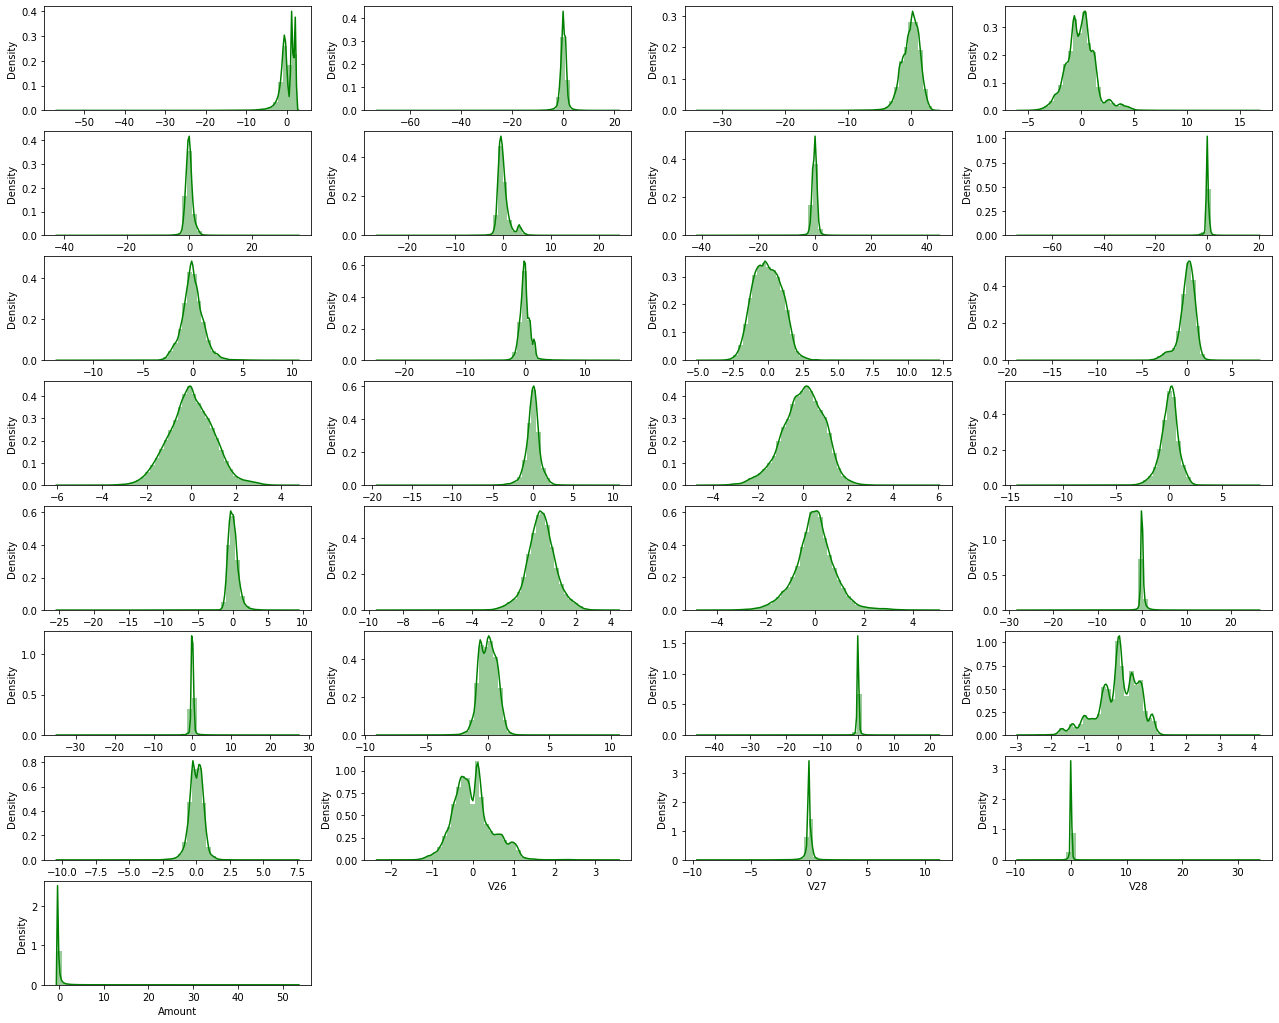

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
col = X_train.columns

plt.figure(figsize=(22,18))
i=0
for fet in col:
    i += 1
    plt.subplot(8, 4, i)
    sns.distplot(X_train[fet], color = 'green')

plt.show()

We can see a lot of skewness in the features of the dataset. We will check the skewness of the data in the dataset and transform the data using power transformer for feature skewness beyond -1 and +1.

In [22]:
# Lets check the skewness of the features
col = X_train.columns
skew_cols = []
for feat in col:
    skew_cols.append(X_train[feat].skew())

skwd_df = pd.concat([pd.DataFrame(col, columns=["Features"]), pd.DataFrame(skew_cols, columns=["Skewness"])], axis=1)
skwd_df.set_index("Features", inplace=True)
skwd_df.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.208749,-4.377344,-2.102095,0.647247,-0.47046,1.260188,-0.637097,-8.377037,0.552161,1.256972,0.346106,-2.215803,0.063164,-1.927041,-0.31571,-1.09778,-3.735758,-0.251403,0.107265,-1.35981,3.389395,-0.185399,-6.986576,-0.562786,-0.424604,0.57484,-2.608192,12.299923,11.552295


In [23]:
# Filtering the features which has skewness less than -1 and greater than +1
skwd_feat = skwd_df.loc[(skwd_df["Skewness"] > 1) | (skwd_df["Skewness"] <-1 )].index
print(skwd_feat)

Index(['V1', 'V2', 'V3', 'V6', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20',
       'V21', 'V23', 'V27', 'V28', 'Amount'],
      dtype='object', name='Features')


#### We can see that there are columns having high skewness and these can be treated with power transformation for better gausian  kind of distribution. 
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# Preprocessing using PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skwd_feat] = pt.fit_transform(X_train[skwd_feat])


# Transforming the test data
X_test[skwd_feat] = pt.transform(X_test[skwd_feat])

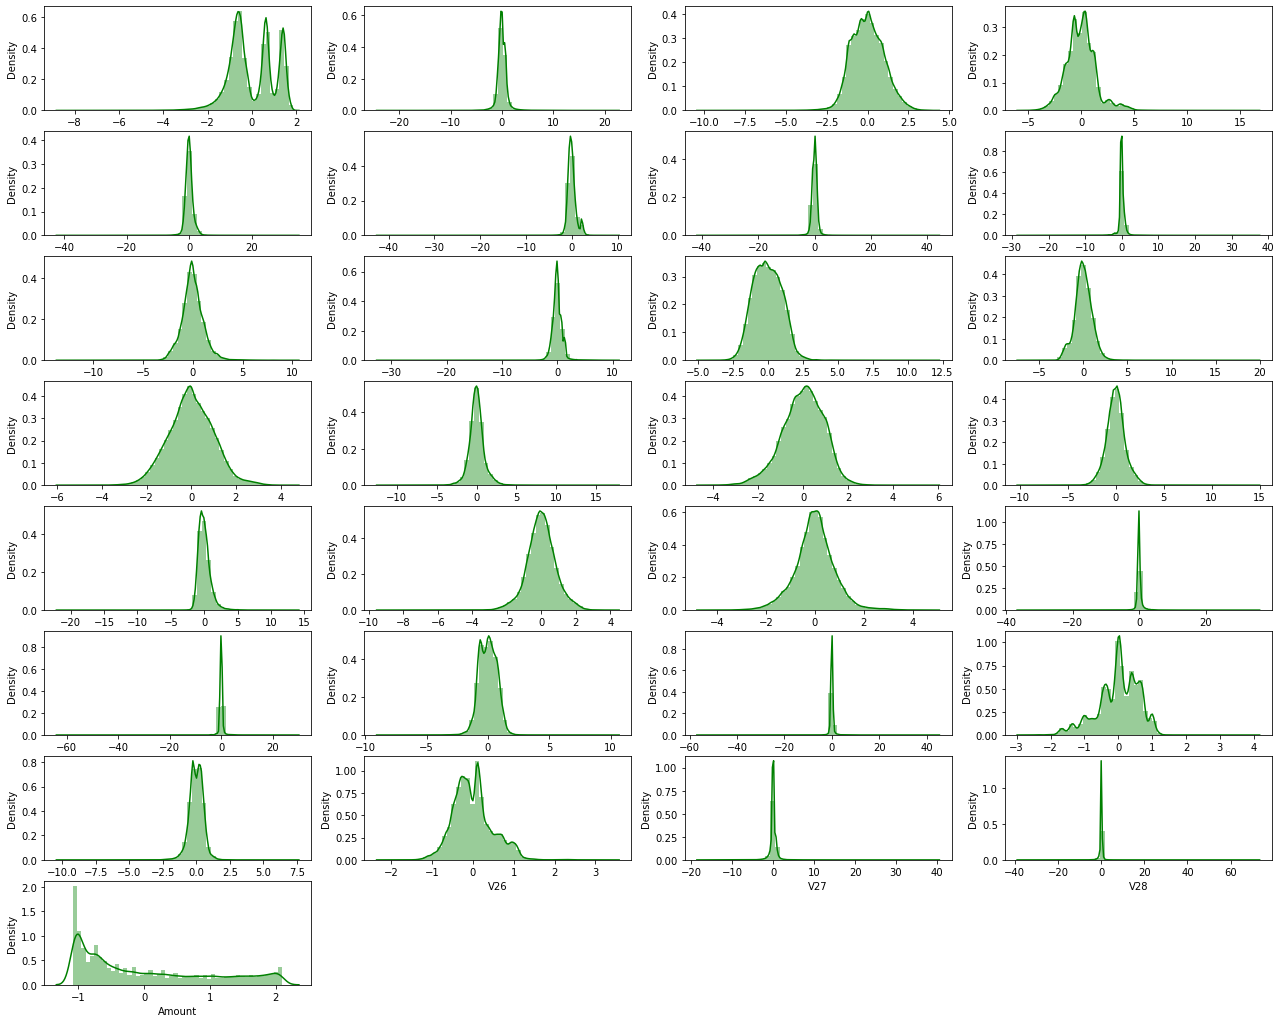

In [25]:
# plot the histogram of a variable from the dataset again to see the result 
col = X_train.columns

plt.figure(figsize=(22,18))
i=0
for feat in col:
    i += 1
    plt.subplot(8, 4, i)
    sns.distplot(X_train[feat], color = 'green')

plt.show()

## Model Building with imbalanced data
- Building different models on the imbalanced dataset and checking the result

#### We will build different classification models on this data and check for the performance. We will be using the following models for the classification:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- KNN
- SVM

#### For evaluating the different models, we will have the below consideration:
- **Accuracy** : We cannot use accuracy as the evaluation parameter since there is huge class imbalance. The accuracy can be very high since one class is already in a large amount
- **AUROC** : We also cannot use AUROC because false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives
- **F1 Score** : This can be used as an evaluation parameter for our classification problem
- **AUPRC** : Since we have a dataset with high class imbalance, we can use Average Precision score (AUPRC) or Area Under Precision Recall Curve as our evaluation metric. It is the best evaluation metric for our problem since we are more aligned to get the positive examples which are very few in numbers. 
- **Precision and Recall**: Both these parameters are inversely proportional to each other in the way they work. But We can use these parameters to evaluate our model.

#### Since we are going to use the ROC curve for each model, we are defining a function to plot the ROC curve for the models where called.

In [26]:
# Function to plot ROC curve 
def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [27]:
# Function to plot metric
def metric_plot(df,title):
    plt.figure(figsize=(15, 4))
    sns.barplot(x=df['Metric'], y=df['Score'], data=df, hue=df['Set'], palette='Set2')
    plt.title(title)
    plt.show()

In [28]:
# Function to plot Model performance report
def model_perf_plot(df,title):
    plt.figure(figsize=(18, 6))
    sns.barplot(x=df['Model'], y=df['Score'], data=df, hue=df['Metric'], palette='Set1')
    plt.title(title)
    plt.show()

### Model 1.1 : Logistic regression
- Imbalanced Data
- L2 regularization 

In [70]:
params = {"C": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]}
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(random_state = 7,penalty = 'l2'),
                        param_grid = params, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
---Time taken 6.463669061660767 seconds ---
Best Average Precision score:  0.7960524723095728
Best hyperparameters:  {'C': 0.01}


In [71]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)

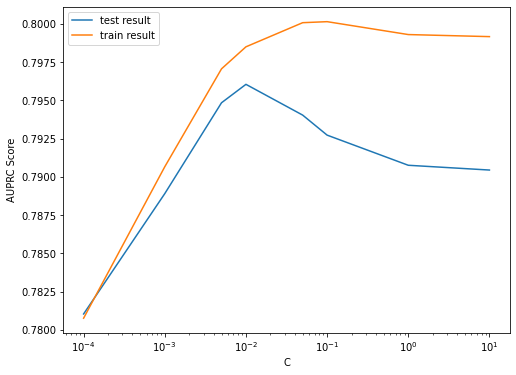

In [72]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('AUPRC Score')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression using Optimal values of hyperparameter:
- C: 0.01

In [73]:
# Training model with optimal hyperparameters
start_time = time.time()
LR_imb = LogisticRegression(C=0.01,penalty = 'l2',random_state = 7)
LR_imb.fit(X_train, y_train)
# Prediction on training data
y_train_pred = LR_imb.predict(X_train)
y_train_pred_proba = LR_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = LR_imb.predict(X_test)
y_test_pred_proba = LR_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 0.636080265045166 seconds ---


In [80]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.89    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 0.77
AUPRC Score for train data: 0.80

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.56      0.66        96

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [112]:
data = [['F1 Score','Train',0.77],['F1 Score','Test',0.66],['AUPRC Score','Train',0.80],['AUPRC Score','Test',0.66]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

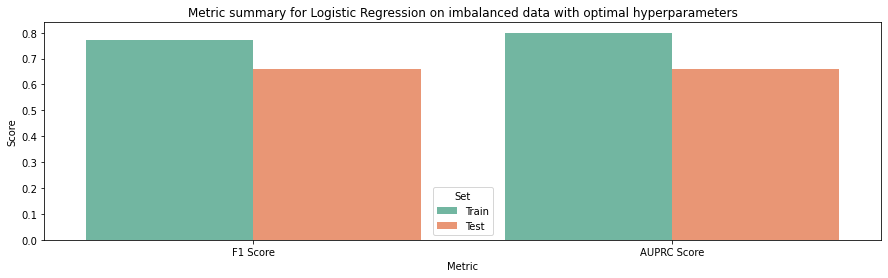

In [126]:
metric_plot(df,'Metric summary for Logistic Regression on imbalanced data with optimal hyperparameters')

<Figure size 720x432 with 0 Axes>

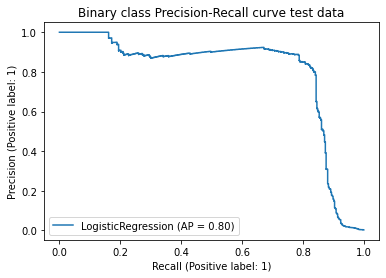

In [86]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(LR_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

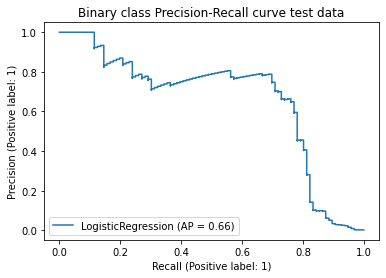

In [87]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(LR_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

### Model 1.2 : Decision Tree
- Imbalanced Data

In [91]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'max_depth': range(8, 14, 2),
    'min_samples_leaf': range(10, 40, 10),
    'min_samples_split': range(10, 80, 10),
    'splitter':['best', 'random']
}

# specify model with RBF kernel
model = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state = 7)
# set up GridSearchCV()
model_cv_dt = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
model_cv_dt.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv_dt.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_dt.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
---Time taken 347.72163796424866 seconds ---
Best Average Precision score:  0.8034795920698121
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 40, 'splitter': 'random'}


#### Decision Tree using Optimal values of hyperparameter:
- Max depth: 10
- Min samples leaf: 10
- Min samples Split: 40
- Splitter: random

In [92]:
# Training model with optimal hyperparameters
start_time = time.time()
DT_imb = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 10, min_samples_split= 40, splitter= 'random', random_state = 7)
DT_imb.fit(X_train, y_train)
# Prediction on training data
y_train_pred = DT_imb.predict(X_train)
y_train_pred_proba = DT_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = DT_imb.predict(X_test)
y_test_pred_proba = DT_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 0.5129644870758057 seconds ---


In [93]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.89      0.77      0.83       396

    accuracy                           1.00    227845
   macro avg       0.95      0.89      0.91    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 0.83
AUPRC Score for train data: 0.84

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.68      0.73        96

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [127]:
data = [['F1 Score','Train',0.83],['F1 Score','Test',0.73],['AUPRC Score','Train',0.84],['AUPRC Score','Test',0.66]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

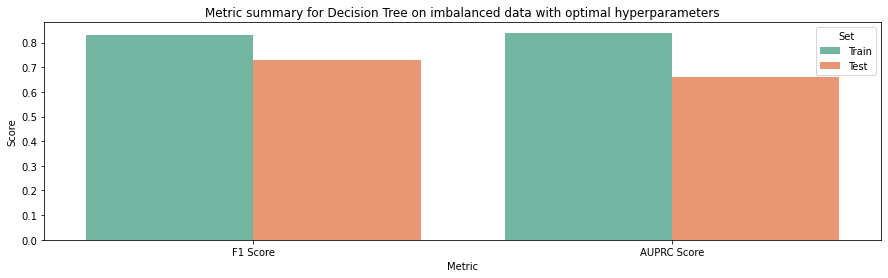

In [128]:
metric_plot(df,'Metric summary for Decision Tree on imbalanced data with optimal hyperparameters')

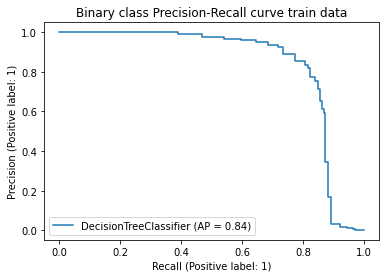

In [94]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(DT_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

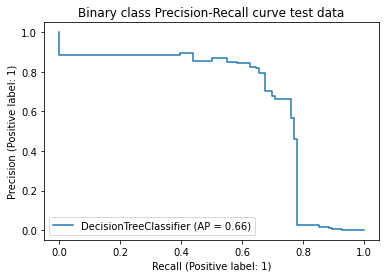

In [95]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(DT_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

### Model 1.3 : Random Forest
- Imbalanced Data

In [98]:
start_time = time.time()
hyper_params = {
    'n_estimators': range(100, 301, 100),
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(10, 41, 10),
    'min_samples_split': range(10, 41, 10),
}

model = RandomForestClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
model_cv_rf = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
model_cv_rf.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv_rf.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_rf.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
---Time taken 7293.304631233215 seconds ---
Best Average Precision score:  0.845156843969897
Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}


#### Random Forest using Optimal values of hyperparameter:
- Max depth: 15
- Min sample leaf: 10
- Min sample split: 20
- Number of estimators: 300

In [99]:
# Training model with optimal hyperparameters
start_time = time.time()
RF_imb = RandomForestClassifier(max_depth= 15, min_samples_leaf= 10, min_samples_split= 20, n_estimators= 300, random_state = 7)
RF_imb.fit(X_train, y_train)
# Prediction on training data
y_train_pred = RF_imb.predict(X_train)
y_train_pred_proba = RF_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = RF_imb.predict(X_test)
y_test_pred_proba = RF_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 476.9995422363281 seconds ---


In [100]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.95      0.80      0.87       396

    accuracy                           1.00    227845
   macro avg       0.98      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 0.87
AUPRC Score for train data: 0.94

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.70      0.75        96

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [129]:
data = [['F1 Score','Train',0.87],['F1 Score','Test',0.75],['AUPRC Score','Train',0.94],['AUPRC Score','Test',0.74]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

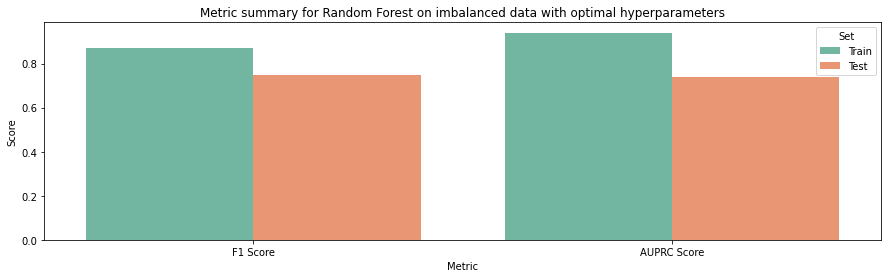

In [130]:
metric_plot(df,'Metric summary for Random Forest on imbalanced data with optimal hyperparameters')

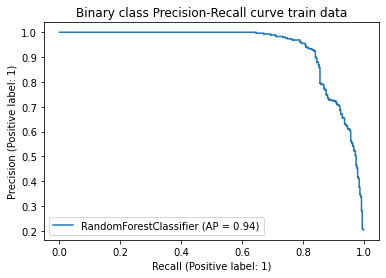

In [101]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(RF_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

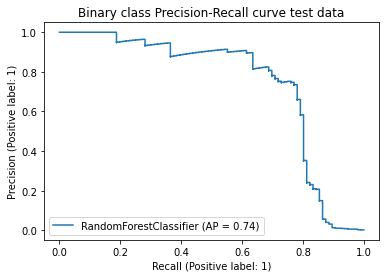

In [102]:
# Plot precision - recall curve
disp = plot_precision_recall_curve(RF_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

### Model 1.4 : XGBoost
- Imbalanced Data

In [28]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': range (6, 11, 1),
    'n_estimators': range(120, 210, 30),
    'subsample':[0.25, 0.50, 0.75],
    'min_child_weight':[1, 3]
    
}

model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state= 7, objective= 'binary:logistic',
    nthread=4)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
model_cv_xg = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
model_cv_xg.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv_xg.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_xg.best_params_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
---Time taken 718.5080606937408 seconds ---
Best Average Precision score:  0.8513873159625717
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 180, 'subsample': 0.75}


#### XGBoost using Optimal values of hyperparameter:
- Learning rate: 0.1
- Max Depth: 6
- Min child weight: 1
- No. of Estimators: 180
- Subsample: 0.75

In [56]:
# Training model with optimal hyperparameters
start_time = time.time()
XGB_imb = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state= 7, objective= 'binary:logistic',
    nthread=4, learning_rate= 0.1, max_depth= 6, min_child_weight= 1, n_estimators= 180, subsample= 0.75)
XGB_imb.fit(X_train, y_train)
# Prediction on training data
y_train_pred = XGB_imb.predict(X_train)
y_train_pred_proba = XGB_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = XGB_imb.predict(X_test)
y_test_pred_proba = XGB_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 2.2640433311462402 seconds ---


In [57]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      0.99      1.00       392

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.79      0.85       100

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [58]:
data = [['F1 Score','Train',1],['F1 Score','Test',0.85],['AUPRC Score','Train',1],['AUPRC Score','Test',0.88]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

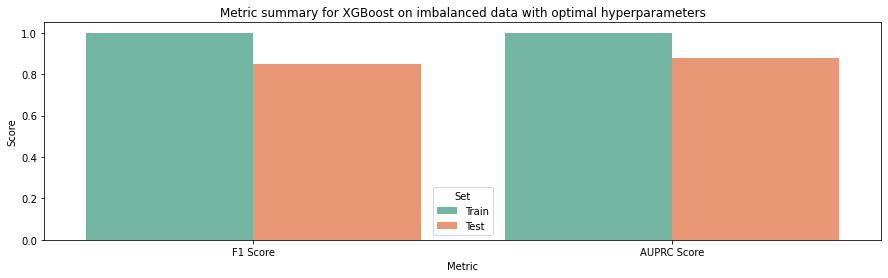

In [59]:
metric_plot(df,'Metric summary for XGBoost on imbalanced data with optimal hyperparameters')

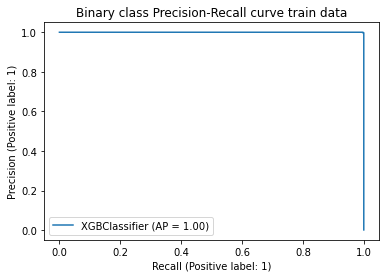

In [60]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(XGB_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

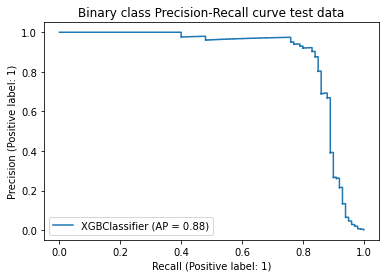

In [61]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(XGB_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

### Model 1.5 : K Nearest Neighbor (KNN)
- Imbalanced Data

In [51]:
estimator_KNN = KNeighborsClassifier(metric='minkowski',weights='distance')
parameters_KNN = {
    'n_neighbors': list(range(24,34,2)),
    'p': (1, 2)
}

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state= 7)

start_time = time.time()
#perform cross validation
model_cv_knn = GridSearchCV(estimator = estimator_KNN,
                        param_grid = parameters_KNN, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv_knn.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv_knn.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_knn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
---Time taken 2186.2225303649902 seconds ---
Best Average Precision score:  0.8170450901107049
Best hyperparameters:  {'n_neighbors': 30, 'p': 1}


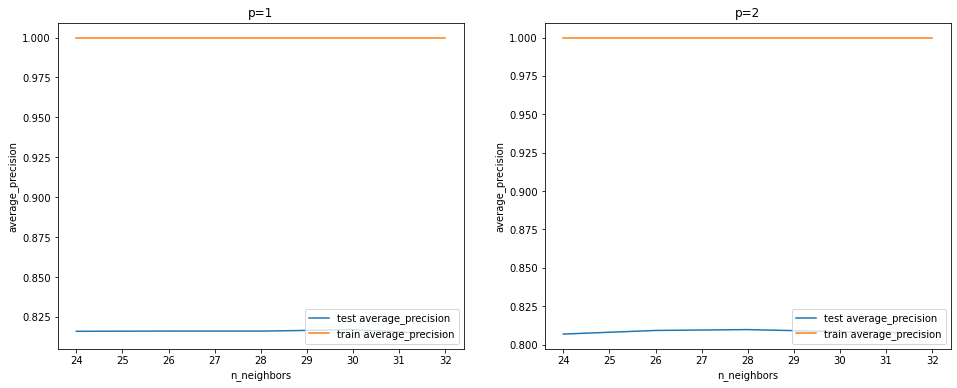

In [52]:
cv_results = pd.DataFrame(model_cv_knn.cv_results_)

# converting n_neighbors to numeric type for plotting on x-axis
cv_results['param_n_neighbors'] = cv_results['param_n_neighbors'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

plt.subplot(121)
p_1 = cv_results[cv_results['param_p']==1]

plt.plot(p_1["param_n_neighbors"], p_1["mean_test_score"])
plt.plot(p_1["param_n_neighbors"], p_1["mean_train_score"])
plt.xlabel('n_neighbors')
plt.ylabel('average_precision')
plt.title("p=1")
plt.legend(['test average_precision', 'train average_precision'], loc='lower right')

plt.subplot(122)
p_2 = cv_results[cv_results['param_p']==2]

plt.plot(p_2["param_n_neighbors"], p_2["mean_test_score"])
plt.plot(p_2["param_n_neighbors"], p_2["mean_train_score"])
plt.xlabel('n_neighbors')
plt.ylabel('average_precision')
plt.title("p=2")
plt.legend(['test average_precision', 'train average_precision'], loc='lower right')

#### K Nearest Neighbor (KNN) using Optimal values of hyperparameter:
- Number of neighbours = 30
- P = 1

In [53]:
# Training model with optimal hyperparameters
start_time = time.time()
KNN_imb = KNeighborsClassifier(n_neighbors = 30,metric = 'minkowski', p=1, weights='distance')
KNN_imb.fit(X_train, y_train)

# Prediction on training data
y_train_pred = KNN_imb.predict(X_train)
y_train_pred_proba = KNN_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = KNN_imb.predict(X_test)
y_test_pred_proba = KNN_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 357.37519240379333 seconds ---


In [54]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00       392

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.83      0.88       100

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [136]:
data = [['F1 Score','Train',1],['F1 Score','Test',0.88],['AUPRC Score','Train',1],['AUPRC Score','Test',0.86]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

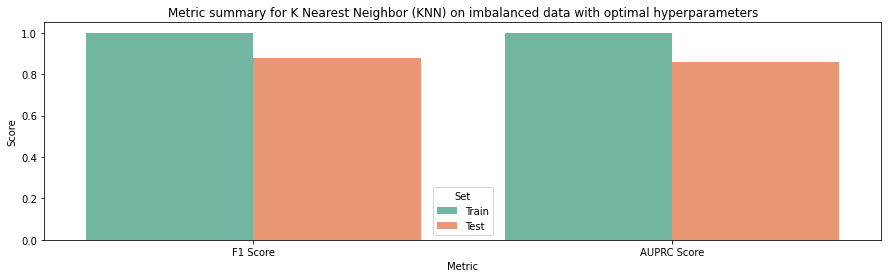

In [137]:
metric_plot(df,'Metric summary for K Nearest Neighbor (KNN) on imbalanced data with optimal hyperparameters')

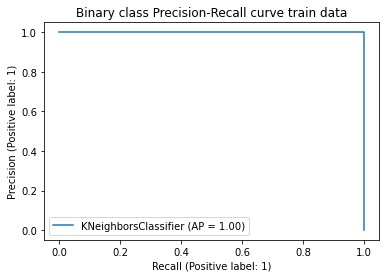

In [55]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(KNN_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

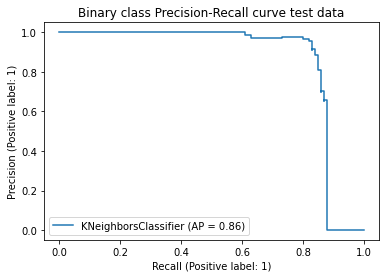

In [56]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(KNN_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

### Model 1.6 : Suport Vector Machine (SVM)
- Imbalanced Data

In [57]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = [ {'gamma': [0.1, 0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]

# specify model with RBF kernel
model = SVC(kernel="rbf",random_state = 7)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
model_cv_svc = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'average_precision', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
model_cv_svc.fit(X_train, y_train)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', model_cv_svc.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_svc.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
---Time taken 1287.788379907608 seconds ---
Best Average Precision score:  0.8260980681643492
Best hyperparameters:  {'C': 10, 'gamma': 0.01}


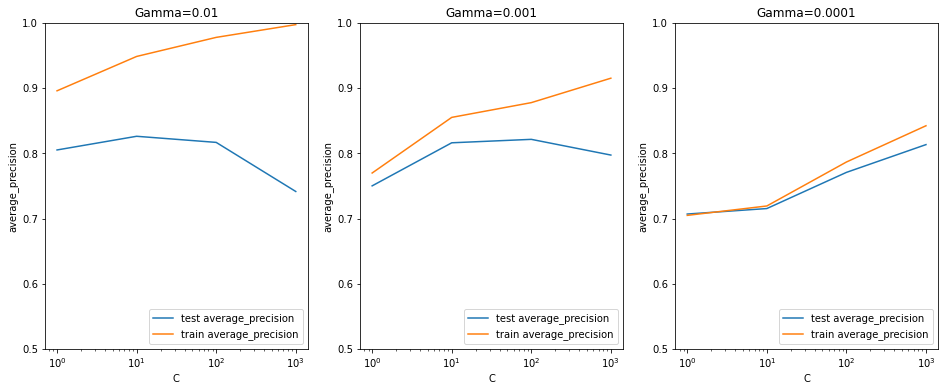

In [58]:
cv_results = pd.DataFrame(model_cv_svc.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('average_precision')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1])
plt.legend(['test average_precision', 'train average_precision'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('average_precision')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1])
plt.legend(['test average_precision', 'train average_precision'], loc='lower right')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('average_precision')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1])
plt.legend(['test average_precision', 'train average_precision'], loc='lower right')
plt.xscale('log')

#### SVM using Optimal values of hyperparameter (kernel = rbf):
- C: 10
- Gamma: 0.01

In [62]:
# Training model with optimal hyperparameters
start_time = time.time()
SVM_imb = SVC(kernel="rbf", C= 10, gamma = 0.01, random_state = 7,probability=True)
SVM_imb.fit(X_train, y_train)
# Prediction on training data
y_train_pred = SVM_imb.predict(X_train)
y_train_pred_proba = SVM_imb.predict_proba(X_train)[:,1]
#Prediction on test data
y_test_pred = SVM_imb.predict(X_test)
y_test_pred_proba = SVM_imb.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 608.6112222671509 seconds ---


In [63]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train, y_train_pred))
print('-'*100)
print('F1 Score for train data: %0.2f'%f1_score(y_train, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train, y_train_pred_proba))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       0.99      0.83      0.90       392

    accuracy                           1.00    227845
   macro avg       1.00      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845

----------------------------------------------------------------------------------------------------
F1 Score for train data: 0.90
AUPRC Score for train data: 0.94

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.92      0.77      0.84       100

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

-------------

In [64]:
data = [['F1 Score','Train',0.90],['F1 Score','Test',0.84],['AUPRC Score','Train',0.94],['AUPRC Score','Test',0.87]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

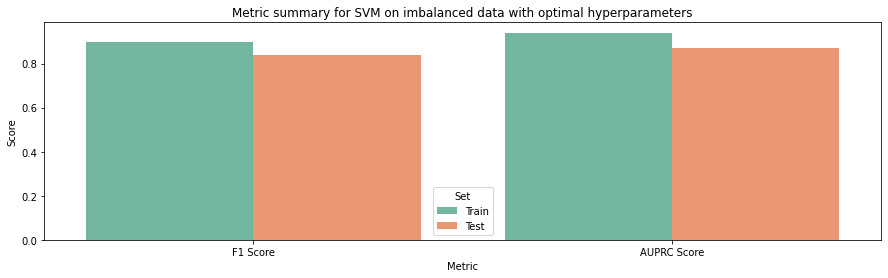

In [65]:
metric_plot(df,'Metric summary for SVM on imbalanced data with optimal hyperparameters')

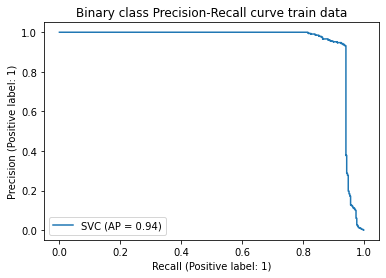

In [66]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(SVM_imb, X_train, y_train)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

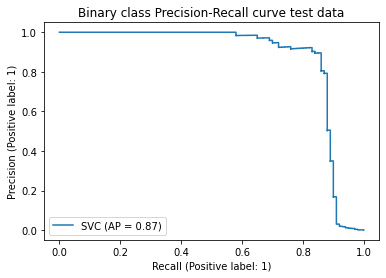

In [67]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(SVM_imb, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

#### Let's summarise what accuracies we got on the various models for the imbalanced data:

In [196]:
data = [['Logistic Regression','F1 Score',0.66],['Logistic Regression','AUROC Score',0.0],['Logistic Regression','AUPRC Score',0.66],['Logistic Regression','Precision Score',0.0],['Logistic Regression','Recall Score',0.0],
       ['Decision Tree','F1 Score',0.73],['Decision Tree','AUROC Score',0.0],['Decision Tree','AUPRC Score',0.66],['Decision Tree','Precision Score',0.0],['Decision Tree','Recall Score',0.0],
       ['Random Forest','F1 Score',0.75],['Random Forest','AUROC Score',0.0],['Random Forest','AUPRC Score',0.74],['Random Forest','Precision Score',0.0],['Random Forest','Recall Score',0.0],
       ['XGBoost','F1 Score',0.85],['XGBoost','AUROC Score',0.0],['XGBoost','AUPRC Score',0.88],['XGBoost','Precision Score',0.0],['XGBoost','Recall Score',0.0],
       ['KNN','F1 Score',0.85],['KNN','AUROC Score',0.0],['KNN','AUPRC Score',0.86],['KNN','Precision Score',0.0],['KNN','Recall Score',0.0],
       ['SVM','F1 Score',0.84],['SVM','AUROC Score',0.0],['SVM','AUPRC Score',0.87],['SVM','Precision Score',0.0],['SVM','Recall Score',0.0]]
df = pd.DataFrame(data, columns = ['Model','Metric', 'Score'])

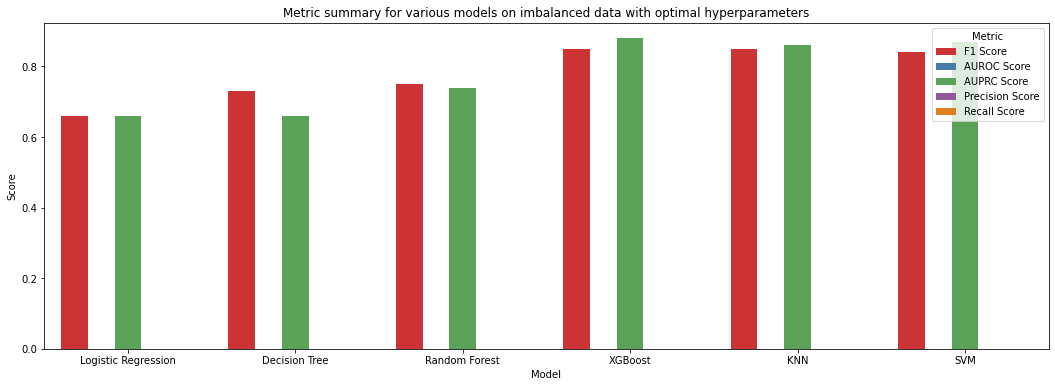

In [195]:
model_perf_plot(df,'Metric summary for various models on imbalanced data with optimal hyperparameters')

### Observation:

In the above graph, we can see that on the imbalanced data, the models were normal. The best result for F1 score and AUPRC is shown by XGBoost. So the best model for the classification of imbalanced dataset is XGBoost.

### Printing the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 10
2nd Top var = 14
3rd Top var = 12


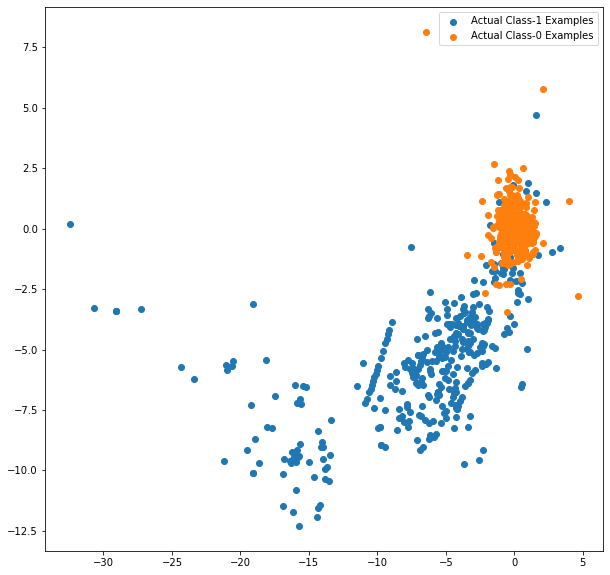

In [76]:
var_imp = []
for i in XGB_imb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(XGB_imb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(XGB_imb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(XGB_imb.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(XGB_imb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(XGB_imb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [36]:
print('Train auc =', roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9999999887844063
Threshold= 0.25308335


**Observation:** At 0.253 threshold XGBoost classifier has the highest ROC score with high TPR and low FPR

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

#### Using this method, we can assign weights to randomly chosen data points from the minority class. In this way, the occurrence of each data point will be multiplied by the assigned weight, and the machine learning algorithm will now be able to focus on this class while optimising the loss function. However, this method does not add any new information and may even exaggerate the existing information quite a bit.

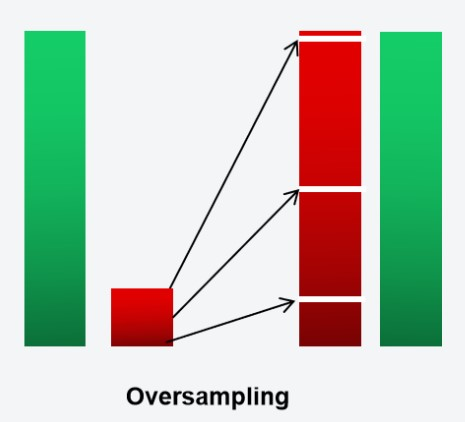

In [38]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority') # We will resample only the minority class to balance the data
# fit and apply the transform
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [39]:
# Checking shape of data
print('Before resampling with Random Oversampling: {}'.format(X_train.shape))
print('After resampling with Random Oversampling: {}'.format(X_train_os.shape))

print('\nClass Distribution')

# Befor sampling class distribution
print('\nBefore resampling with Random Oversampling:\n',y_train.value_counts())
# new class distribution 
print('\nAfter resampling with Random Oversampling:\n',y_train_os.value_counts())

Before resampling with Random Oversampling: (227845, 29)
After resampling with Random Oversampling: (454906, 29)

Class Distribution

Before resampling with Random Oversampling:
 0    227453
1       392
Name: Class, dtype: int64

After resampling with Random Oversampling:
 0    227453
1    227453
Name: Class, dtype: int64


## Model Building using Random Oversampling
- Building different models on the balanced dataset and checking the result
- Dataset balanced using Random Oversampling

### Model 2.1 : Logistic Regression
- Balanced Data - Using Random oversampling
- L2 regularization

In [64]:
# Logistic Regression parameters for Stratified K-fold cross validation
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelLR_CV_os = GridSearchCV(estimator = LogisticRegression(random_state = 7,penalty = 'l2'),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelLR_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best AUROC score: ', ModelLR_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelLR_CV_os.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
---Time taken 22.356292963027954 seconds ---
Best AUROC score:  0.986631613212109
Best hyperparameters:  {'C': 1000}


In [65]:
# cross validation results
cv_results = pd.DataFrame(ModelLR_CV_os.cv_results_)

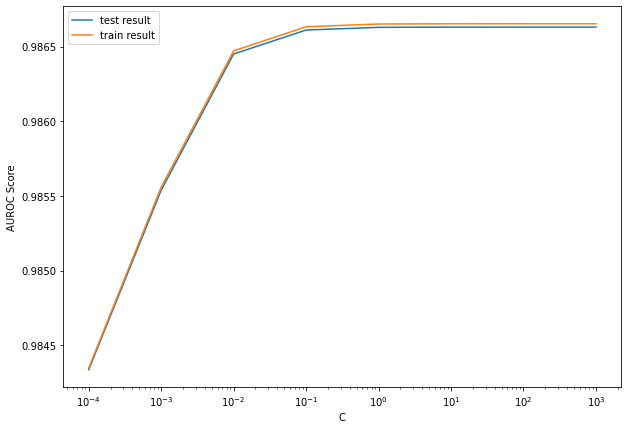

In [66]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 7))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('AUROC Score')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression using Optimal values of hyperparameter:
- C: 1000

In [67]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelLR_os = LogisticRegression(C = 1000, penalty = 'l2',random_state = 7)
ModelLR_os.fit(X_train_os, y_train_os)
# Prediction on training data
y_train_pred = ModelLR_os.predict(X_train_os)
y_train_pred_proba = ModelLR_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelLR_os.predict(X_test)
y_test_pred_proba = ModelLR_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 1.421205759048462 seconds ---


In [68]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227453
           1       0.97      0.92      0.95    227453

    accuracy                           0.95    454906
   macro avg       0.95      0.95      0.95    454906
weighted avg       0.95      0.95      0.95    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 0.99
F1 Score for train data: 0.95
AUPRC Score for train data: 0.99
Precision Score for train data: 0.97
Recall Score for train data: 0.92

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.06      0.91      0.11       100

    accuracy                           0.97     56962
   macro avg      

In [141]:
data = [['F1 Score','Train',0.95],['F1 Score','Test',0.11],['AUPRC Score','Train',0.99],['AUPRC Score','Test',0.78],['AUROC Score','Train',0.99],['AUROC Score','Test',0.98],['Recall Score','Train',0.92],['Recall Score','Test',0.91],['Precision Score','Train',0.97],['Precision Score','Test',0.06]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

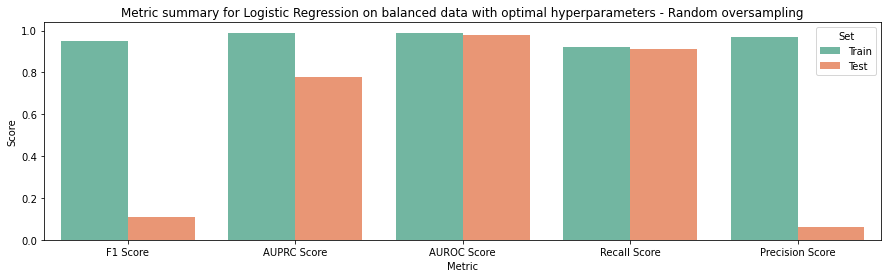

In [142]:
metric_plot(df,'Metric summary for Logistic Regression on balanced data with optimal hyperparameters - Random oversampling')

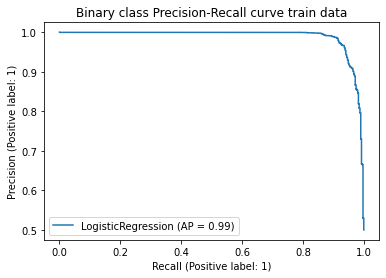

In [69]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelLR_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


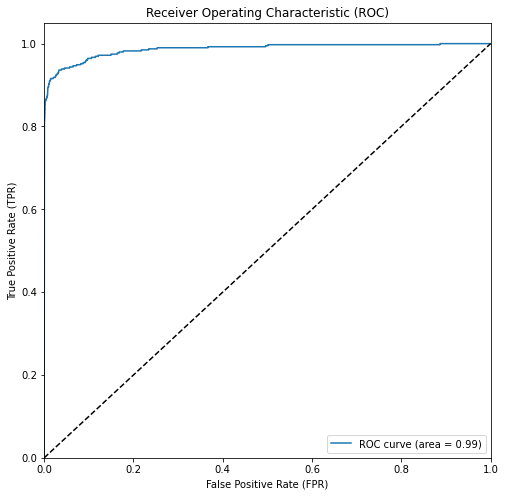

In [70]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

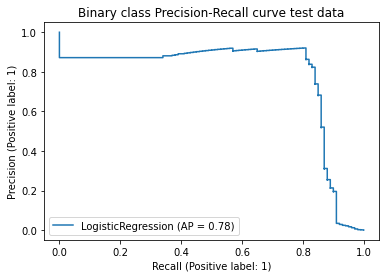

In [71]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelLR_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


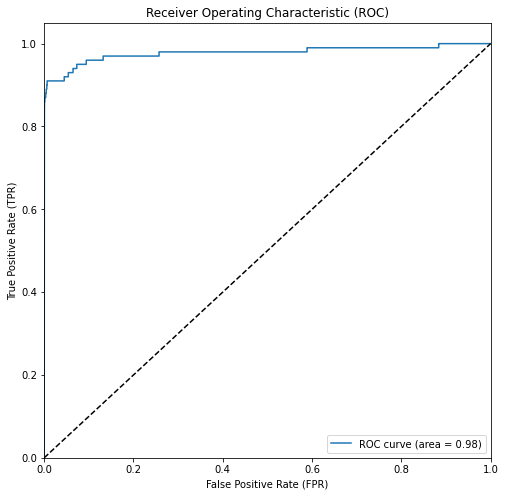

In [72]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 2.2 : Decision Tree
- Balanced Data - Using Random oversampling

In [73]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'max_depth': range(8, 12, 2),
    'min_samples_leaf': range(20, 60, 20),
    'min_samples_split': range(50, 200, 10),
    'splitter':['best', 'random']
}

model = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelDT_CV_os = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelDT_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelDT_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelDT_CV_os.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
---Time taken 215.23648643493652 seconds ---
Best Average Precision score:  0.9990664347122684
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 120, 'splitter': 'best'}


#### Decision Tree using Optimal values of hyperparameter:
- Max depth: 10
- Min samples leaf: 40
- Min samples Split: 120
- Splitter: best

In [74]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelDT_os = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 40, min_samples_split= 120, splitter= 'best', random_state = 7)
ModelDT_os.fit(X_train_os, y_train_os)
# Prediction on training data
y_train_pred = ModelDT_os.predict(X_train_os)
y_train_pred_proba = ModelDT_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelDT_os.predict(X_test)
y_test_pred_proba = ModelDT_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 9.659021615982056 seconds ---


In [75]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227453
           1       0.99      0.99      0.99    227453

    accuracy                           0.99    454906
   macro avg       0.99      0.99      0.99    454906
weighted avg       0.99      0.99      0.99    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 0.99
AUPRC Score for train data: 1.00
Precision Score for train data: 0.99
Recall Score for train data: 0.99

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.16      0.82      0.27       100

    accuracy                           0.99     56962
   macro avg      

In [152]:
data = [['F1 Score','Train',0.99],['F1 Score','Test',0.27],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.73],['AUROC Score','Train',1.0],['AUROC Score','Test',0.91],['Recall Score','Train',0.99],['Recall Score','Test',0.82],['Precision Score','Train',0.99],['Precision Score','Test',0.16]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

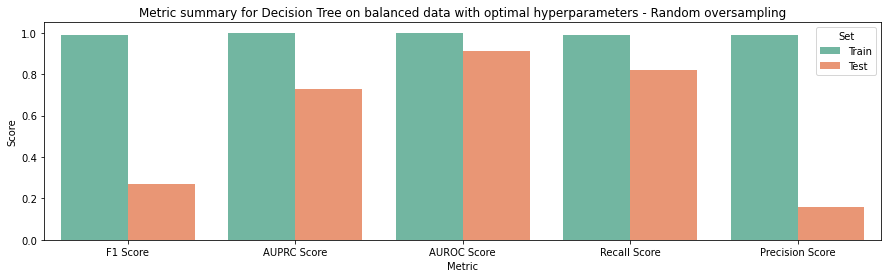

In [153]:
metric_plot(df,'Metric summary for Decision Tree on balanced data with optimal hyperparameters - Random oversampling')

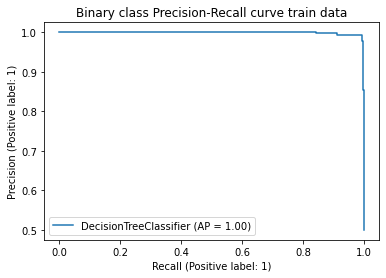

In [76]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelDT_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


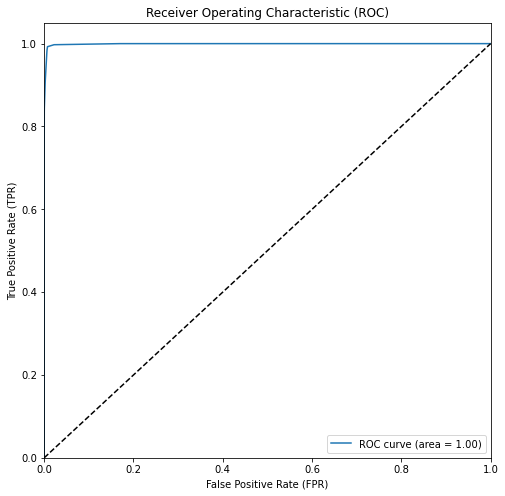

In [77]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

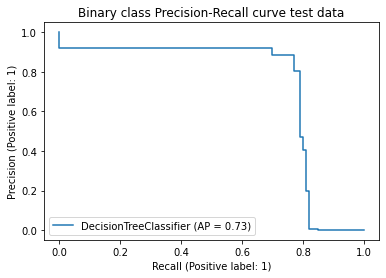

In [78]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelDT_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


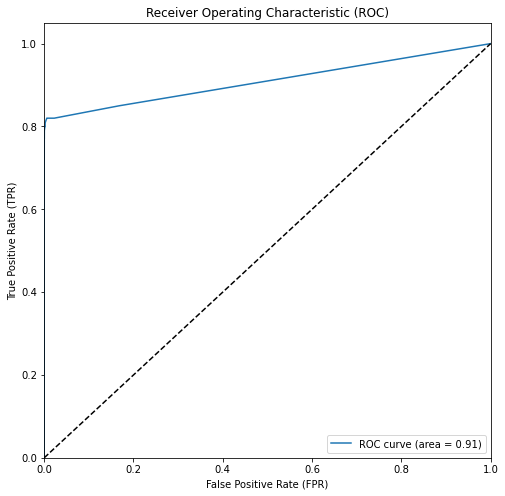

In [79]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 2.3 : Random Forest
- Balanced Data - Using Random oversampling

In [80]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'n_estimators': range(100, 250, 50),
    'max_depth': range(6, 17, 4),
    'min_samples_leaf': range(15, 30, 5),
    'min_samples_split': range(15, 30, 5),
}

model = RandomForestClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelRF_CV_os = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelRF_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelRF_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelRF_CV_os.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
---Time taken 5169.102622509003 seconds ---
Best Average Precision score:  0.9999852735730186
Best hyperparameters:  {'max_depth': 14, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 100}


#### Random Forest using Optimal values of hyperparameter:
- Max depth: 14
- Min sample leaf: 15
- Min sample split: 20
- Number of estimators: 100

In [81]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelRF_os = RandomForestClassifier(max_depth= 14, min_samples_leaf= 15, min_samples_split= 20, n_estimators= 100, random_state = 7)
ModelRF_os.fit(X_train_os, y_train_os)
# Prediction on training data
y_train_pred = ModelRF_os.predict(X_train_os)
y_train_pred_proba = ModelRF_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelRF_os.predict(X_test)
y_test_pred_proba = ModelRF_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 146.50314092636108 seconds ---


In [82]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.85      0.83       100

    accuracy                           1.00     56962
   macro avg      

In [154]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.83],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.86],['AUROC Score','Train',1.0],['AUROC Score','Test',0.98],['Recall Score','Train',1.0],['Recall Score','Test',0.85],['Precision Score','Train',1.0],['Precision Score','Test',0.80]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

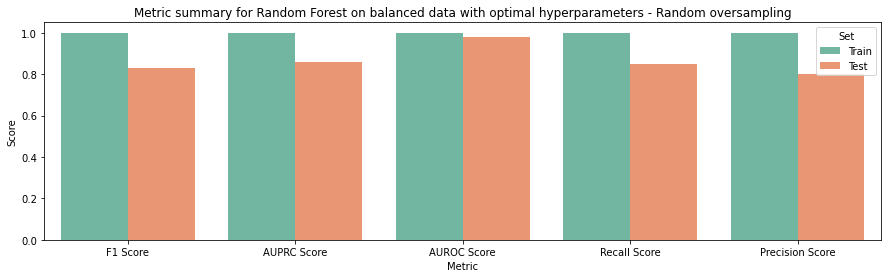

In [155]:
metric_plot(df,'Metric summary for Random Forest on balanced data with optimal hyperparameters - Random oversampling')

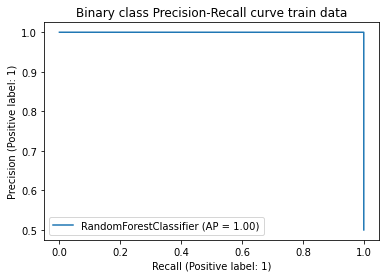

In [83]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelRF_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


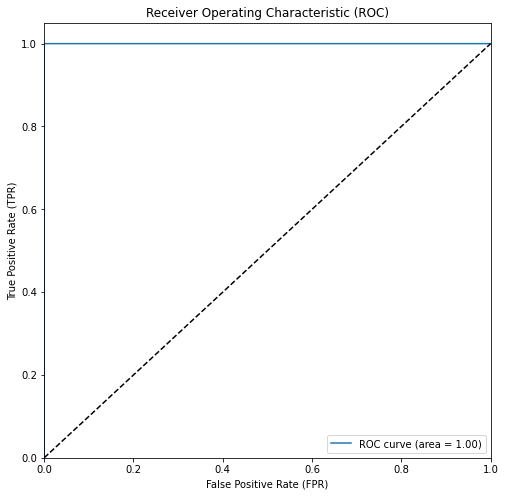

In [84]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

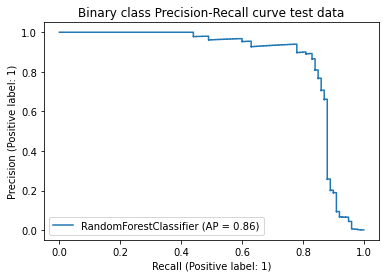

In [85]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelRF_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


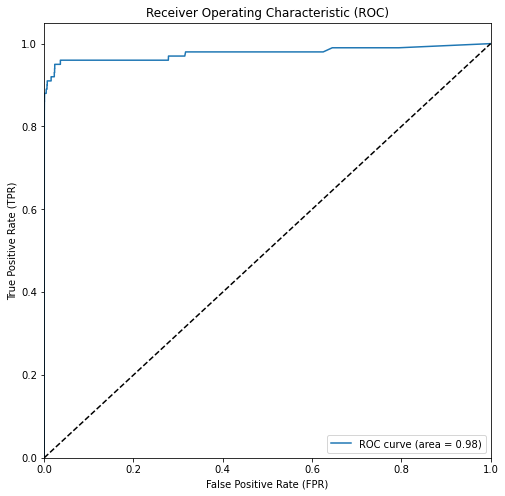

In [86]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 2.4 : XGBoost
- Balanced Data - Using Random oversampling

In [87]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': range (6, 12, 1),
    'n_estimators': range(100, 230, 40),
    'subsample':[0.75, 1, 1.5],
    'min_child_weight':[1, 5]
    
}

model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic',
    nthread=4)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelXG_CV_os = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelXG_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelXG_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelXG_CV_os.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
---Time taken 3031.8206601142883 seconds ---
Best Average Precision score:  0.9999850016062025
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 220, 'subsample': 1}


#### XGBoost using Optimal values of hyperparameter:
- Learning rate: 0.1
- Max Depth: 6
- Min child weight: 1
- No. of Estimators: 220
- Subsample: 1

In [40]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelXG_os = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic', single_precision_histogram=True, 
    nthread=4, learning_rate= 0.1, max_depth= 6, min_child_weight= 1, n_estimators= 220, subsample = 1)
ModelXG_os.fit(X_train_os, y_train_os)
# Prediction on training data
y_train_pred = ModelXG_os.predict(X_train_os)
y_train_pred_proba = ModelXG_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelXG_os.predict(X_test)
y_test_pred_proba = ModelXG_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 3.418998956680298 seconds ---


In [41]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.91      0.86      0.88       100

    accuracy                           1.00     56962
   macro avg      

In [51]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.88],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.87],['AUROC Score','Train',1.0],['AUROC Score','Test',0.99],['Recall Score','Train',1.0],['Recall Score','Test',0.86],['Precision Score','Train',1.0],['Precision Score','Test',0.91]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

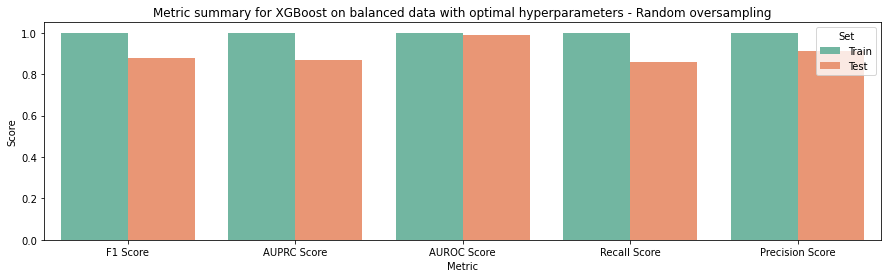

In [52]:
metric_plot(df,'Metric summary for XGBoost on balanced data with optimal hyperparameters - Random oversampling')

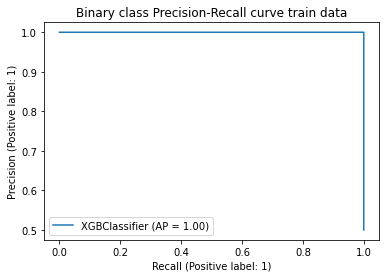

In [44]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelXG_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


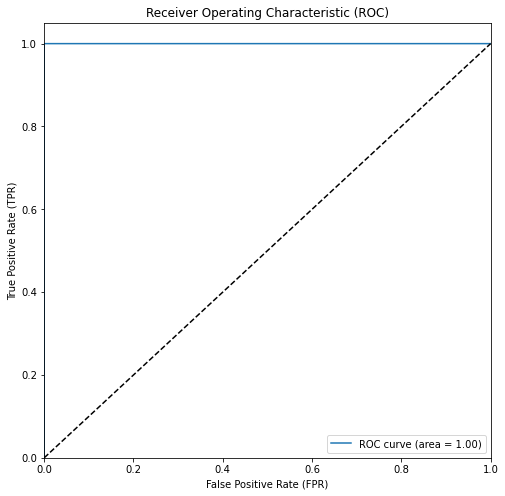

In [45]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

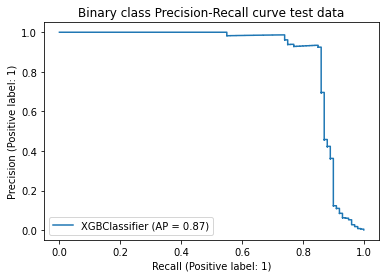

In [46]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelXG_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


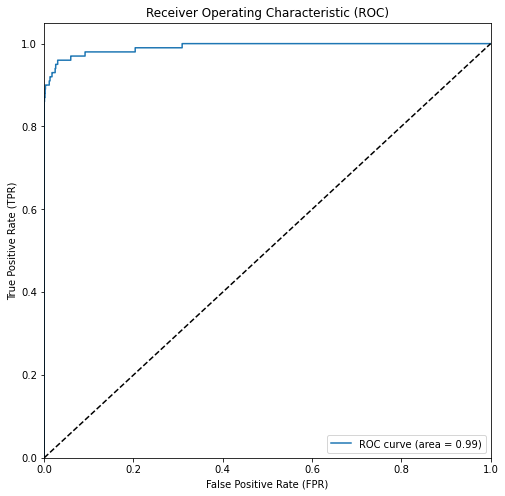

In [47]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 2.5 : K Nearest Neighbor (KNN)
- Balanced Data - Using Random oversampling

In [44]:
# KNN parameters for Stratified K-fold cross vaidation
estimator_KNN = KNeighborsClassifier(metric='minkowski',weights='distance')
parameters_KNN = {
    'n_neighbors': list(range(3,10,1)),
}

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelKNN_CV_os = GridSearchCV(estimator = estimator_KNN,
                        param_grid = parameters_KNN, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelKNN_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelKNN_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelKNN_CV_os.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
---Time taken 1867.6640510559082 seconds ---
Best Average Precision score:  0.9998527167766852
Best hyperparameters:  {'n_neighbors': 3}


#### K Nearest Neighbor (KNN) using Optimal values of hyperparameter:
- Number of neighbours = 3

In [45]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelKNN_os = KNeighborsClassifier(n_neighbors = 3, metric='minkowski', weights='distance')
ModelKNN_os.fit(X_train_os, y_train_os)

# Prediction on training data
y_train_pred = ModelKNN_os.predict(X_train_os)
y_train_pred_proba = ModelKNN_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelKNN_os.predict(X_test)
y_test_pred_proba = ModelKNN_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 291.49232506752014 seconds ---


In [46]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.85      0.83       100

    accuracy                           1.00     56962
   macro avg      

In [158]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.83],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.74],['AUROC Score','Train',1.0],['AUROC Score','Test',0.93],['Recall Score','Train',1.0],['Recall Score','Test',0.85],['Precision Score','Train',1.0],['Precision Score','Test',0.80]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

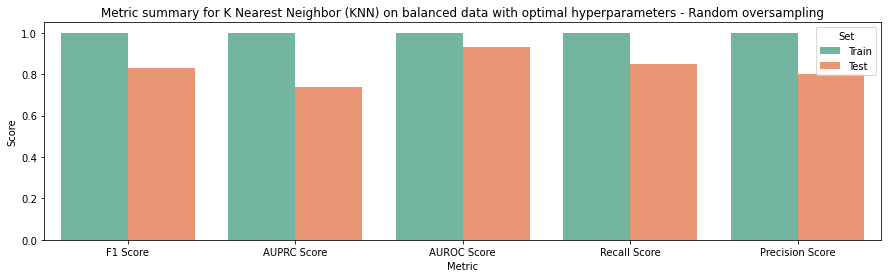

In [159]:
metric_plot(df,'Metric summary for K Nearest Neighbor (KNN) on balanced data with optimal hyperparameters - Random oversampling')

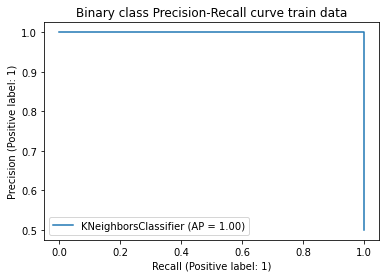

In [47]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelKNN_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


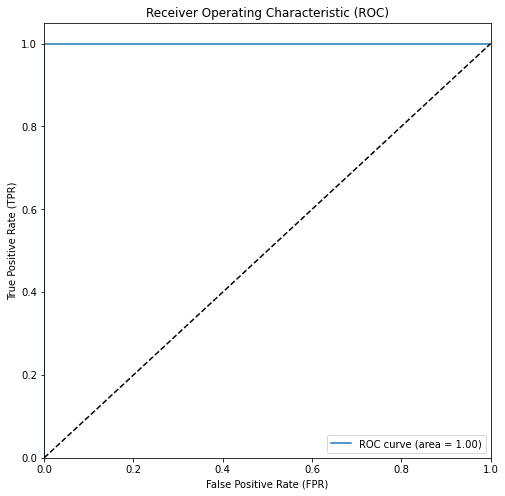

In [48]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

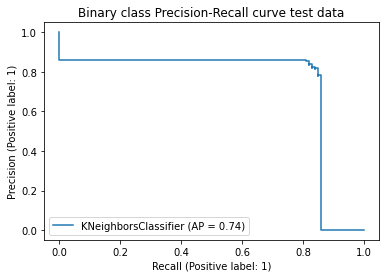

In [49]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelKNN_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


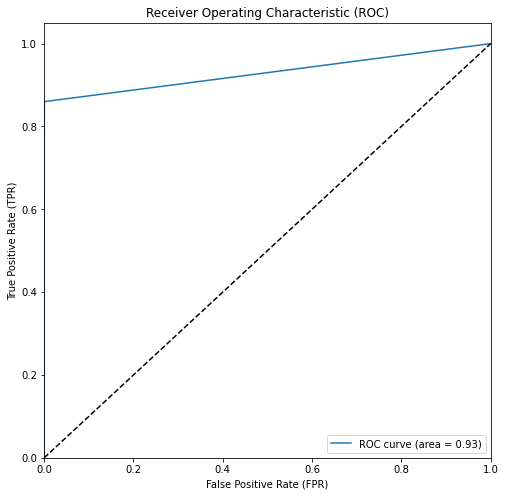

In [50]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 2.6 : Suport Vector Machine (SVM)
- Balanced Data - Using Random oversampling

In [34]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = [ {'gamma': [0.1, 0.01],
                     'C': [1, 10, 100]}]

# specify model with RBF kernel
model = SVC(kernel="rbf",random_state = 7)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelSVC_CV_os = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelSVC_CV_os.fit(X_train_os, y_train_os)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelSVC_CV_os.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelSVC_CV_os.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
---Time taken 15770.379957914352 seconds ---
Best Average Precision score:  0.9999824685353599
Best hyperparameters:  {'C': 10, 'gamma': 0.1}


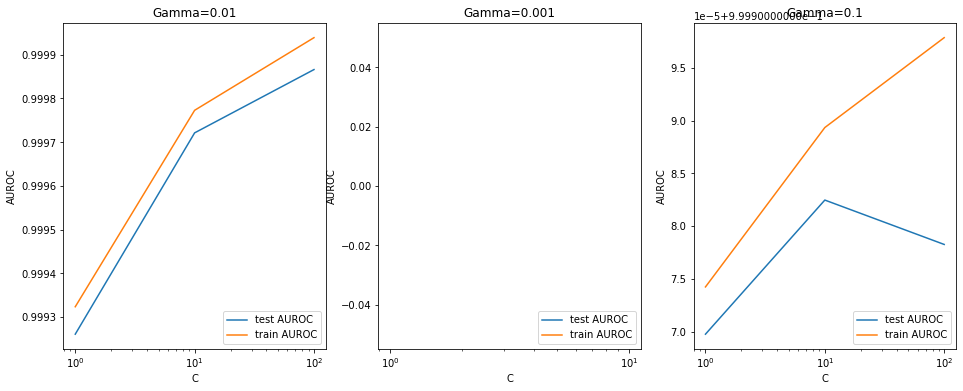

In [35]:
cv_results = pd.DataFrame(ModelSVC_CV_os.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.01")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.001")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.1")
#plt.ylim([0.99, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

#### SVM using Optimal values of hyperparameter (kernel = rbf):
- C: 10
- Gamma: 0.1

In [36]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelSVM_os = SVC(kernel="rbf", C= 10, gamma = 0.1, random_state = 7, probability=True)
ModelSVM_os.fit(X_train_os, y_train_os)
# Prediction on training data
y_train_pred = ModelSVM_os.predict(X_train_os)
y_train_pred_proba = ModelSVM_os.predict_proba(X_train_os)[:,1]
#Prediction on test data
y_test_pred = ModelSVM_os.predict(X_test)
y_test_pred_proba = ModelSVM_os.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 12122.836793899536 seconds ---


In [39]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_os, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_os, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_os, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_os, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_os, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_os, y_train_pred))
print('')
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.77      0.49      0.60       100

    accuracy                           1.00     56962
   macro avg      

In [161]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.60],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.47],['AUROC Score','Train',1.0],['AUROC Score','Test',0.76],['Recall Score','Train',1.0],['Recall Score','Test',0.49],['Precision Score','Train',1.0],['Precision Score','Test',0.77]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

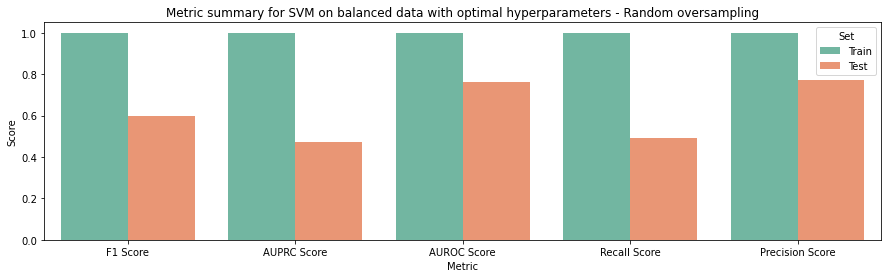

In [162]:
metric_plot(df,'Metric summary for SVM on balanced data with optimal hyperparameters - Random oversampling')

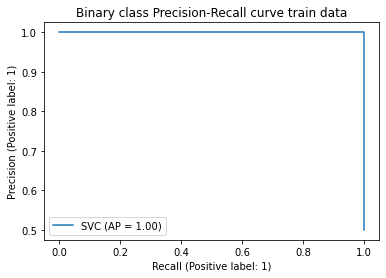

In [40]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelSVM_os, X_train_os, y_train_os)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


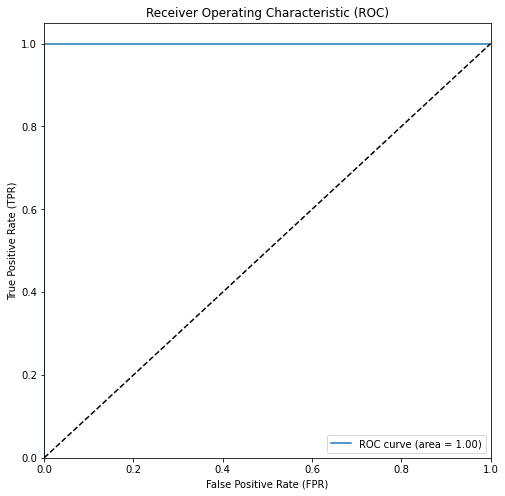

In [41]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_os,y_train_pred_proba)

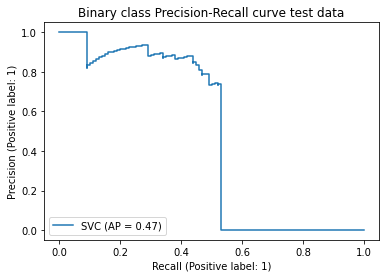

In [42]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelSVM_os, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


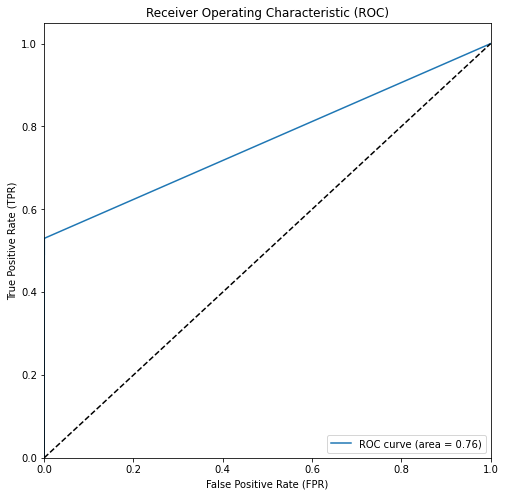

In [43]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

In [49]:
data = [['Logistic Regression','F1 Score',0.11],['Logistic Regression','AUROC Score',0.98],['Logistic Regression','AUPRC Score',0.78],['Logistic Regression','Precision Score',0.06],['Logistic Regression','Recall Score',0.91],
       ['Decision Tree','F1 Score',0.27],['Decision Tree','AUROC Score',0.91],['Decision Tree','AUPRC Score',0.73],['Decision Tree','Precision Score',0.16],['Decision Tree','Recall Score',0.82],
       ['Random Forest','F1 Score',0.83],['Random Forest','AUROC Score',0.98],['Random Forest','AUPRC Score',0.86],['Random Forest','Precision Score',0.80],['Random Forest','Recall Score',0.85],
       ['XGBoost','F1 Score',0.87],['XGBoost','AUROC Score',0.99],['XGBoost','AUPRC Score',0.87],['XGBoost','Precision Score',0.91],['XGBoost','Recall Score',0.86],
       ['KNN','F1 Score',0.83],['KNN','AUROC Score',0.93],['KNN','AUPRC Score',0.74],['KNN','Precision Score',0.80],['KNN','Recall Score',0.85],
       ['SVM','F1 Score',0.60],['SVM','AUROC Score',0.76],['SVM','AUPRC Score',0.47],['SVM','Precision Score',0.77],['SVM','Recall Score',0.49]]
df = pd.DataFrame(data, columns = ['Model','Metric', 'Score'])

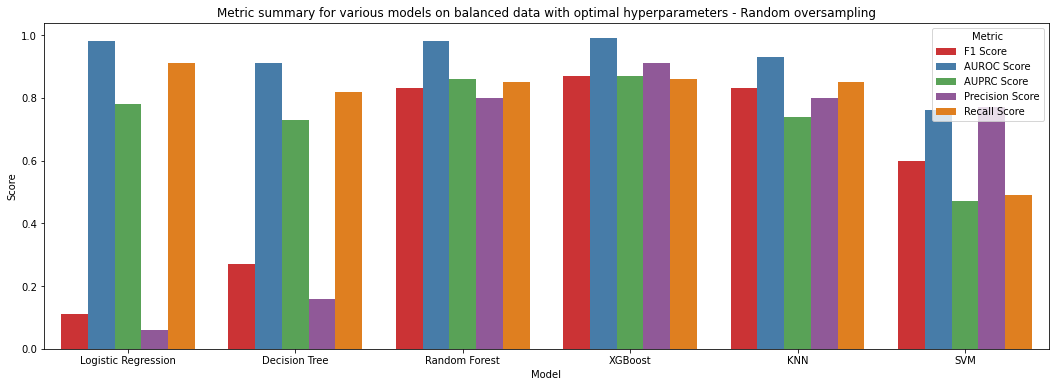

In [50]:
model_perf_plot(df,'Metric summary for various models on balanced data with optimal hyperparameters - Random oversampling')

### Observation:

We can see that the highest accuracy ( In terms of AUROC and AUPRC) was shown by XGBoost model. It has a very good AUROC value of **99%** together with Recall value of **86%** and precision value of **89%** as well. So for Random oversampling, the best model is XGBoost 

### SMOTE (Synthetic Minority Oversampling Technique)

#### In this process, we can generate new data points that lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. This method uses the K-nearest neighbours to create random synthetic samples.

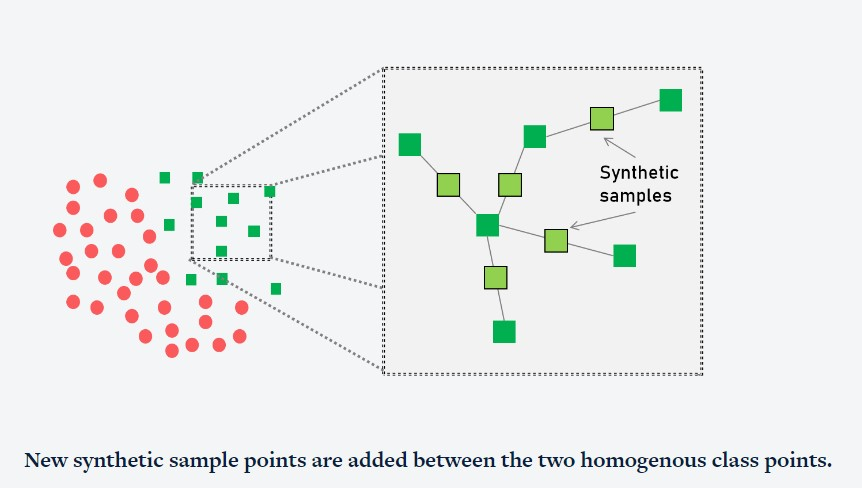

#### Printing the class distribution after applying SMOTE 

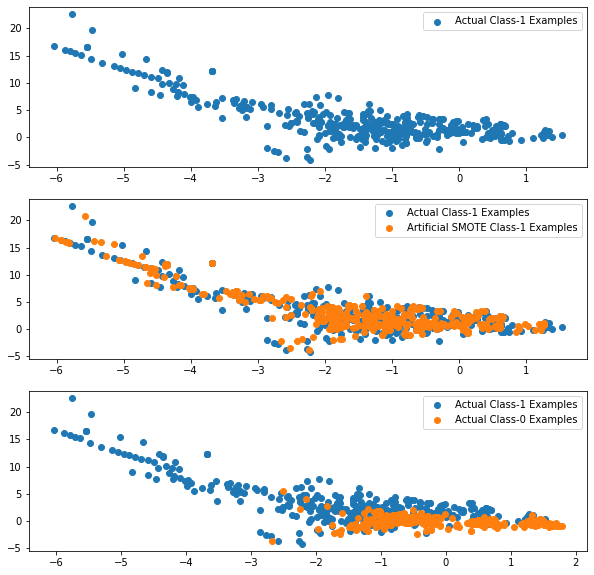

In [70]:
import warnings
warnings.filterwarnings("ignore")

sm = SMOTE(random_state = 7)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [71]:
# Checking shape of data
print('Before resampling with SMOTE: {}'.format(X_train.shape))
print('After resampling with SMOTE: {}'.format(X_train_smote.shape))

print('\nClass Distribution')

# Befor sampling class distribution
print('\nBefore resampling with SMOTE:\n',y_train.value_counts())
# new class distribution 
print('\nAfter resampling with SMOTE:\n',y_train_smote.value_counts())

Before resampling with SMOTE: (227845, 29)
After resampling with SMOTE: (454906, 29)

Class Distribution

Before resampling with SMOTE:
 0    227453
1       392
Name: Class, dtype: int64

After resampling with SMOTE:
 0    227453
1    227453
Name: Class, dtype: int64


## Model Building using SMOTE
- Build different models on the balanced dataset and see the result
- Dataset balanced using SMOTE

### Model 3.1 : Logistic Regression
- Balanced Data - Using SMOTE

In [101]:
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1100, 1200, 1300, 1400, 1500]}
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelLR_CV_sm = GridSearchCV(estimator = LogisticRegression(random_state = 7,penalty = 'l2'),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelLR_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best AUROC score: ', ModelLR_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelLR_CV_sm.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
---Time taken 26.825818061828613 seconds ---
Best AUROC score:  0.9884686603543186
Best hyperparameters:  {'C': 1400}


In [102]:
# cross validation results
cv_results = pd.DataFrame(ModelLR_CV_sm.cv_results_)

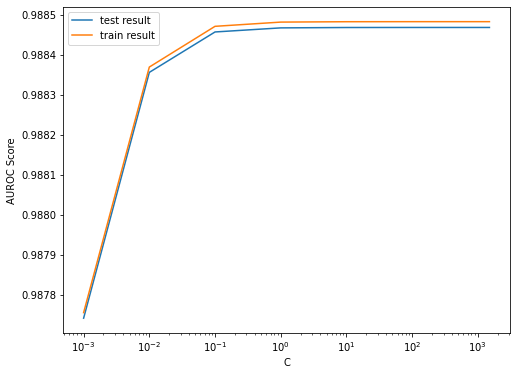

In [103]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('AUROC Score')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression using Optimal values of hyperparameter:
- C: 1400

In [104]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelLR_sm = LogisticRegression(C=1400, penalty = 'l2',random_state = 7)
ModelLR_sm.fit(X_train_smote, y_train_smote)
# Prediction on training data
y_train_pred = ModelLR_sm.predict(X_train_smote)
y_train_pred_proba = ModelLR_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelLR_sm.predict(X_test)
y_test_pred_proba = ModelLR_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 1.5259721279144287 seconds ---


In [105]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227453
           1       0.97      0.92      0.95    227453

    accuracy                           0.95    454906
   macro avg       0.95      0.95      0.95    454906
weighted avg       0.95      0.95      0.95    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 0.99
F1 Score for train data: 0.95
AUPRC Score for train data: 0.99
Precision Score for train data: 0.97
Recall Score for train data: 0.92

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.05      0.91      0.10       100

    accuracy                           0.97     56962
   macro avg      

In [163]:
data = [['F1 Score','Train',0.95],['F1 Score','Test',0.10],['AUPRC Score','Train',0.99],['AUPRC Score','Test',0.78],['AUROC Score','Train',0.99],['AUROC Score','Test',0.98],['Recall Score','Train',0.92],['Recall Score','Test',0.91],['Precision Score','Train',0.97],['Precision Score','Test',0.05]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

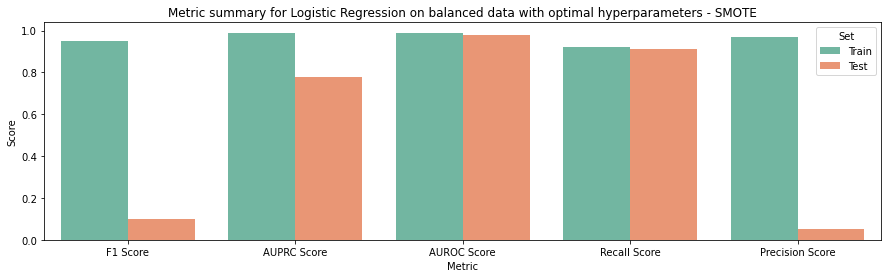

In [164]:
metric_plot(df,'Metric summary for Logistic Regression on balanced data with optimal hyperparameters - SMOTE')

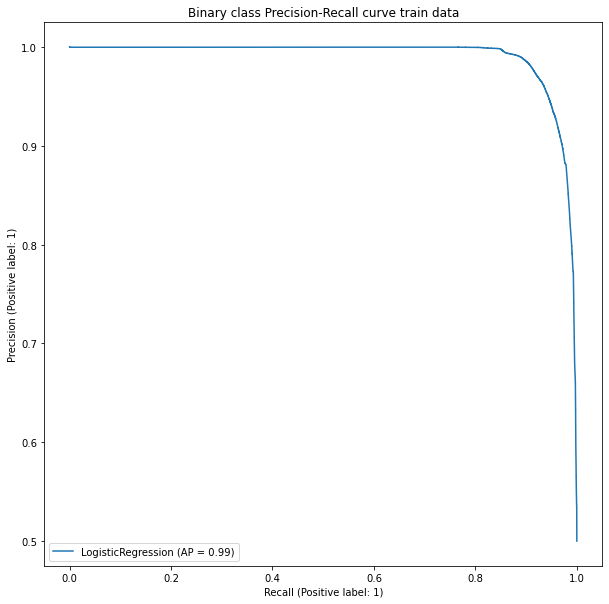

In [106]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelLR_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


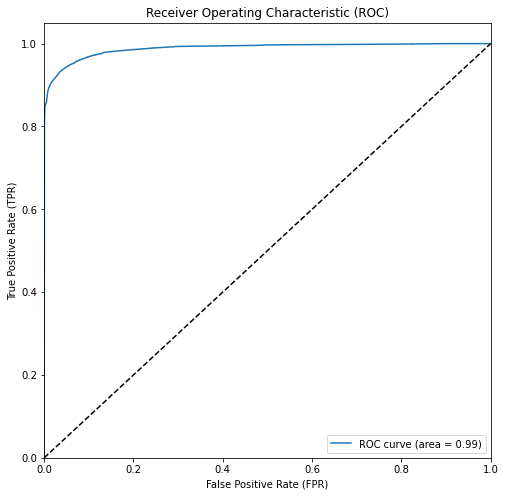

In [107]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

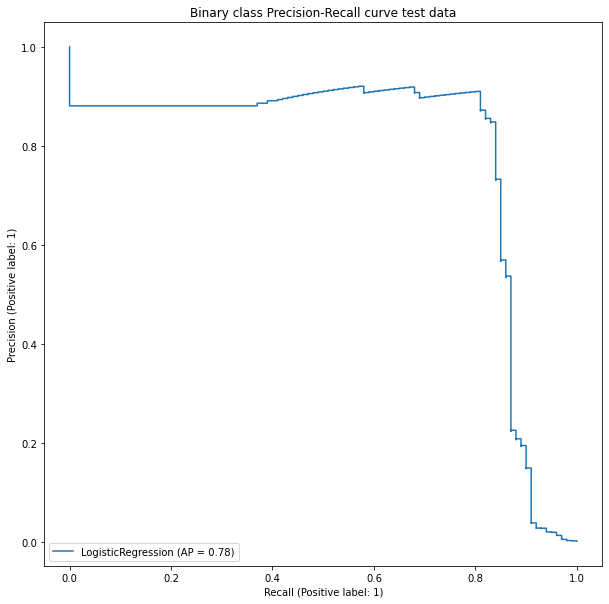

In [108]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelLR_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


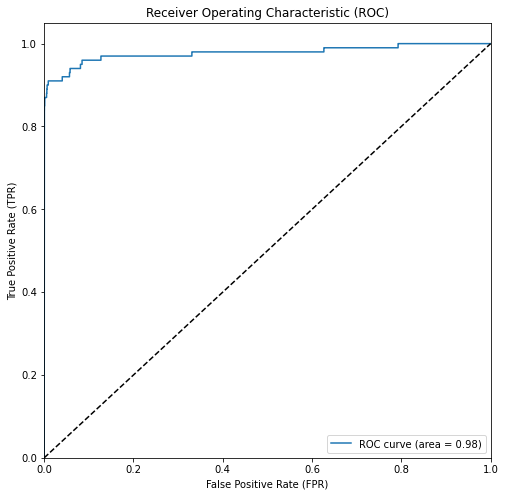

In [109]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 3.2 : Decision Tree
- Balanced Data - Using SMOTE

In [110]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 60, 20),
    'min_samples_split': range(20, 150, 10),
    'splitter':['best', 'random']
}

model = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelDT_CV_sm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelDT_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelDT_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelDT_CV_sm.best_params_)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
---Time taken 225.55409407615662 seconds ---
Best Average Precision score:  0.9981151738701189
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 40, 'splitter': 'best'}


#### Decision Tree using Optimal values of hyperparameter:
- Max depth: 10
- Min samples leaf: 40
- Min samples Split: 40
- Splitter: best

In [111]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelDT_sm = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 40, min_samples_split= 40, splitter= 'best', random_state = 7)
ModelDT_sm.fit(X_train_smote, y_train_smote)
# Prediction on training data
y_train_pred = ModelDT_sm.predict(X_train_smote)
y_train_pred_proba = ModelDT_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelDT_sm.predict(X_test)
y_test_pred_proba = ModelDT_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 17.098151206970215 seconds ---


In [112]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227453
           1       0.99      0.99      0.99    227453

    accuracy                           0.99    454906
   macro avg       0.99      0.99      0.99    454906
weighted avg       0.99      0.99      0.99    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 0.99
AUPRC Score for train data: 1.00
Precision Score for train data: 0.99
Recall Score for train data: 0.99

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56862
           1       0.11      0.87      0.19       100

    accuracy                           0.99     56962
   macro avg      

In [165]:
data = [['F1 Score','Train',0.99],['F1 Score','Test',0.19],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.63],['AUROC Score','Train',1.0],['AUROC Score','Test',0.91],['Recall Score','Train',0.99],['Recall Score','Test',0.87],['Precision Score','Train',0.99],['Precision Score','Test',0.11]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

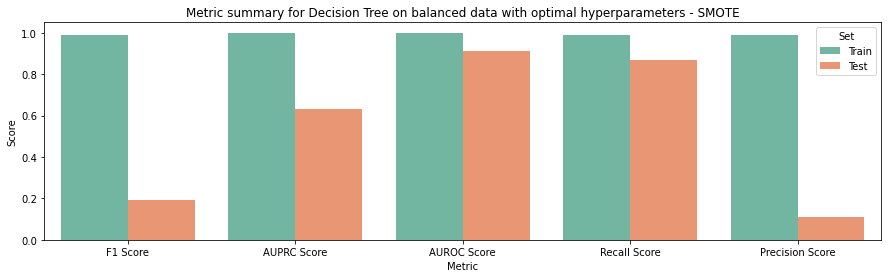

In [166]:
metric_plot(df,'Metric summary for Decision Tree on balanced data with optimal hyperparameters - SMOTE')

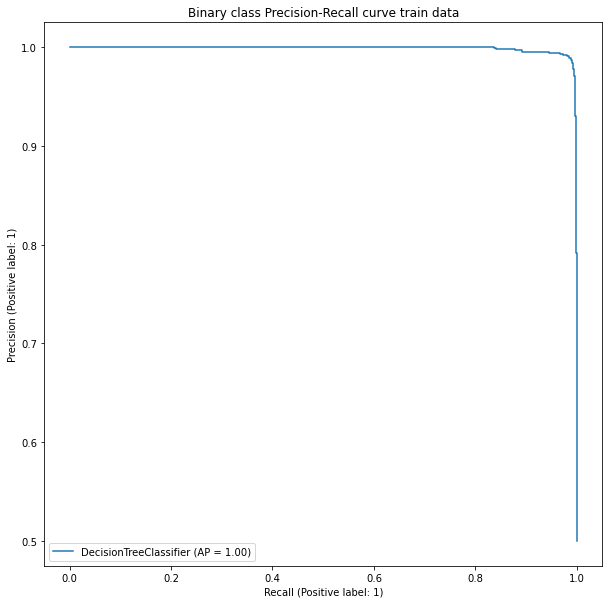

In [113]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelDT_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


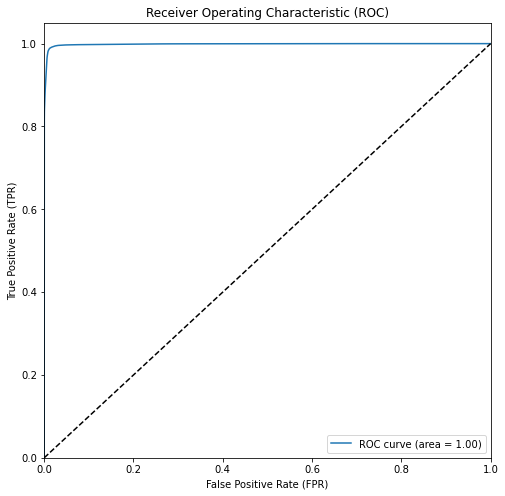

In [114]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

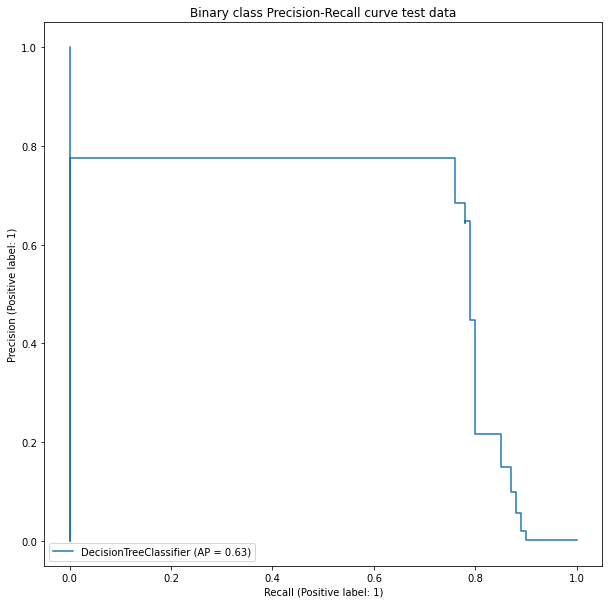

In [115]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelDT_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


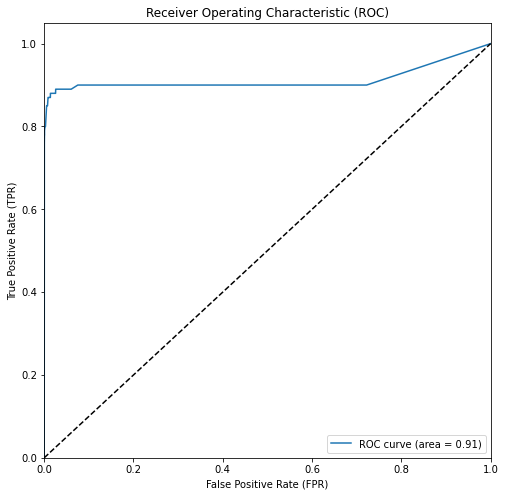

In [116]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 3.3 : Random Forest
- Balanced Data - Using SMOTE

In [118]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'n_estimators': range(100, 301, 100),
    'max_depth': range(6, 15, 4),
    'min_samples_leaf': range(10, 31, 10),
    'min_samples_split': range(10, 31, 10),
}

model = RandomForestClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelRF_CV_sm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelRF_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelRF_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelRF_CV_sm.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
---Time taken 7030.842002630234 seconds ---
Best Average Precision score:  0.999992377569107
Best hyperparameters:  {'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


#### Random Forest using Optimal values of hyperparameter:
- Max depth: 14
- Min sample leaf: 10
- Min sample split: 10
- Number of estimators: 200

#### Random Forest using Optimal values of hyperparameter

In [119]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelRF_sm = RandomForestClassifier(max_depth= 14, min_samples_leaf= 10, min_samples_split= 10, n_estimators= 200, random_state = 7)
ModelRF_sm.fit(X_train_smote, y_train_smote)
# Prediction on training data
y_train_pred = ModelRF_sm.predict(X_train_smote)
y_train_pred_proba = ModelRF_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelRF_sm.predict(X_test)
y_test_pred_proba = ModelRF_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 543.5114960670471 seconds ---


In [120]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.65      0.87      0.74       100

    accuracy                           1.00     56962
   macro avg      

In [167]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.74],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.86],['AUROC Score','Train',1.0],['AUROC Score','Test',0.98],['Recall Score','Train',1.0],['Recall Score','Test',0.87],['Precision Score','Train',1.0],['Precision Score','Test',0.65]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

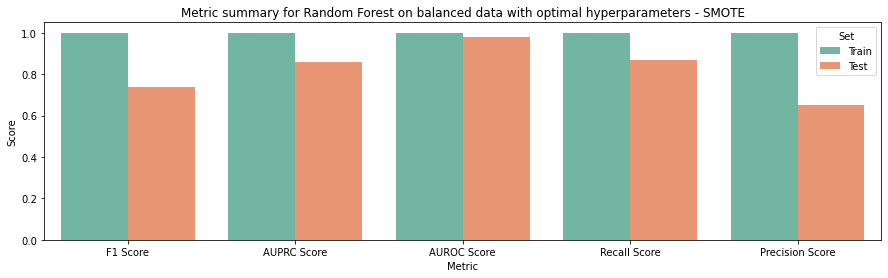

In [168]:
metric_plot(df,'Metric summary for Random Forest on balanced data with optimal hyperparameters - SMOTE')

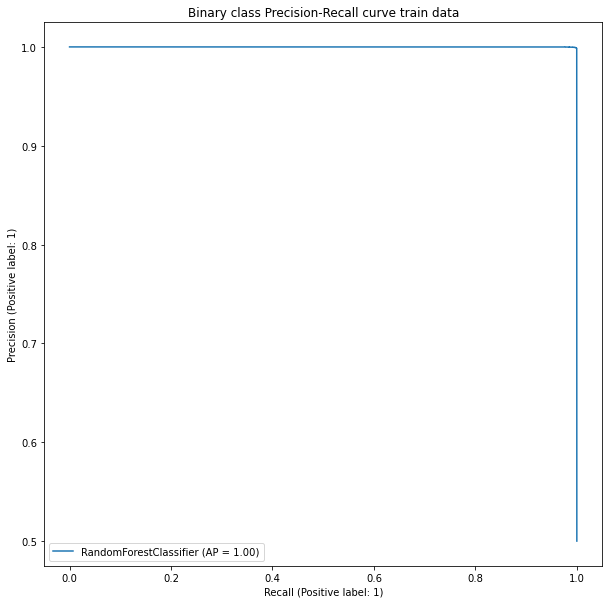

In [121]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelRF_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


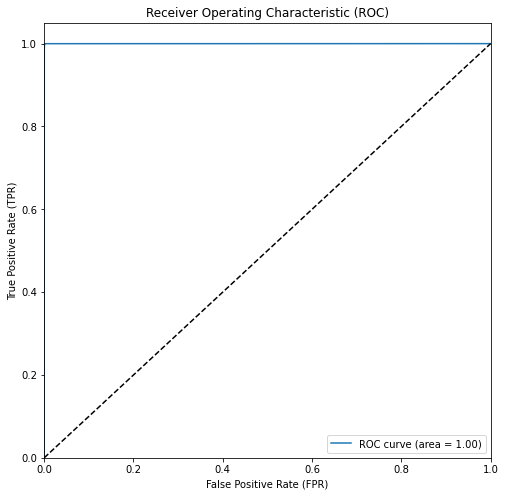

In [122]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

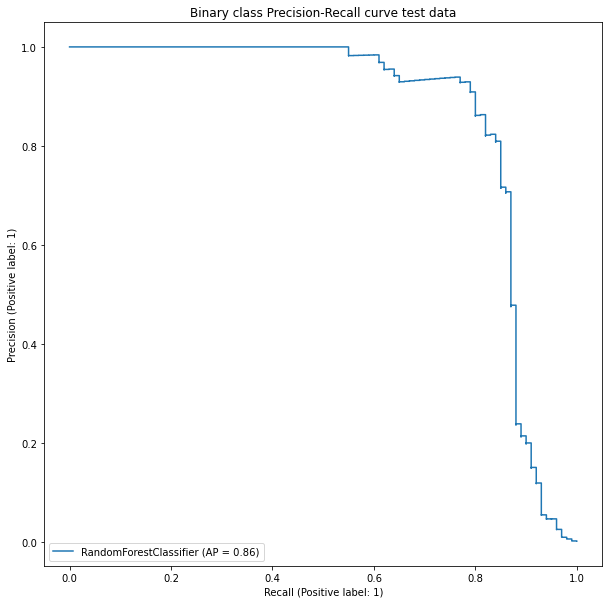

In [123]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelRF_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


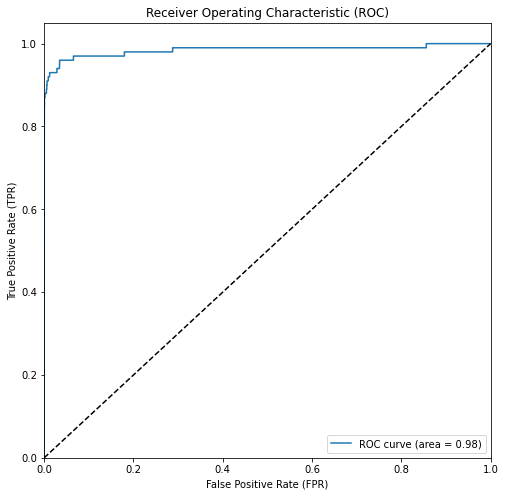

In [124]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 3.4 : XGBoost
- Balanced Data - Using SMOTE

In [125]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': range(2, 10, 2),
    'n_estimators': range(60, 220, 40),
    'subsample':[0.5, 0.75, 1],
    'min_child_weight':[1, 5, 10]
    
}

model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic',
    nthread=4)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelXG_CV_sm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelXG_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelXG_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelXG_CV_sm.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
---Time taken 2213.2080624103546 seconds ---
Best Average Precision score:  0.999986301767867
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 10, 'n_estimators': 180, 'subsample': 1}


#### XGBoost using Optimal values of hyperparameter:
- Learning rate: 0.1
- Max Depth: 8
- Min child weight: 10
- No. of Estimators: 180
- Subsample: 1

In [72]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelXG_sm = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic',
    nthread=4, learning_rate= 0.1, max_depth= 8, min_child_weight= 10, n_estimators= 180, subsample= 1)
ModelXG_sm.fit(X_train_smote, y_train_smote)
# Prediction on training data
y_train_pred = ModelXG_sm.predict(X_train_smote)
y_train_pred_proba = ModelXG_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelXG_sm.predict(X_test)
y_test_pred_proba = ModelXG_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 4.3751232624053955 seconds ---


In [73]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.62      0.85      0.72       100

    accuracy                           1.00     56962
   macro avg      

In [74]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.72],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.86],['AUROC Score','Train',1.0],['AUROC Score','Test',0.99],['Recall Score','Train',1.0],['Recall Score','Test',0.85],['Precision Score','Train',1.0],['Precision Score','Test',0.62]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

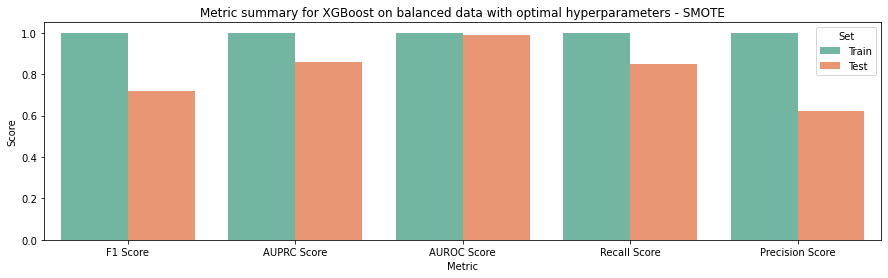

In [75]:
metric_plot(df,'Metric summary for XGBoost on balanced data with optimal hyperparameters - SMOTE')

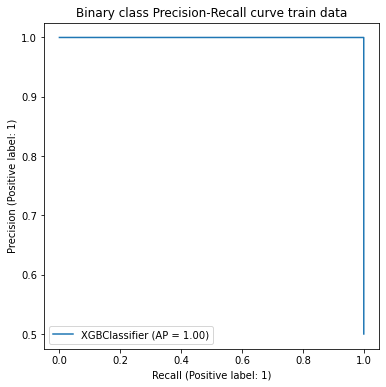

In [78]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelXG_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


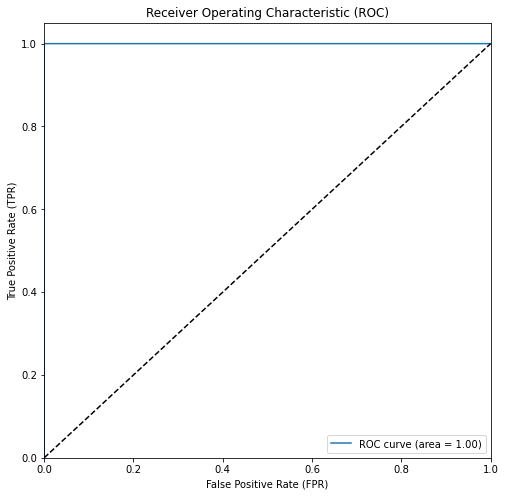

In [81]:
# plot roc curve train data

print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

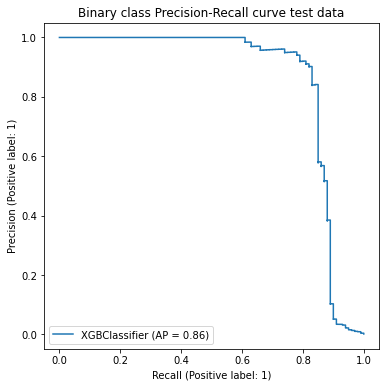

In [82]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelXG_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


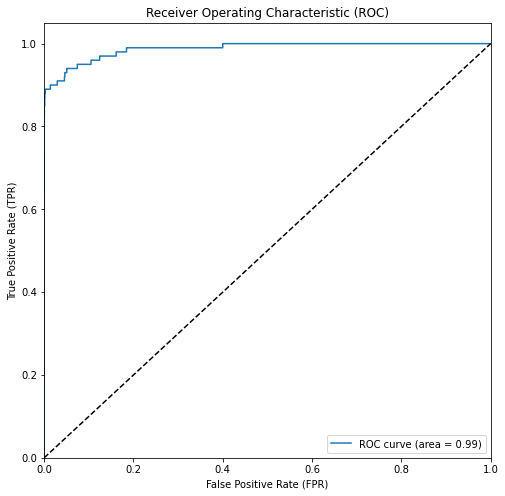

In [83]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 3.5 : K Nearest Neighbor (KNN)
- Balanced Data - Using SMOTE

In [132]:
estimator_KNN = KNeighborsClassifier(metric='minkowski',weights='distance')
parameters_KNN = {
    'n_neighbors': list(range(8,20,2)),
}

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelKNN_CV_sm = GridSearchCV(estimator = estimator_KNN,
                        param_grid = parameters_KNN, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelKNN_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelKNN_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelKNN_CV_sm.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
---Time taken 2003.3738913536072 seconds ---
Best Average Precision score:  0.9996768098983372
Best hyperparameters:  {'n_neighbors': 18}


#### K Nearest Neighbor (KNN) using Optimal values of hyperparameter:
- Number of neighbours = 18

In [133]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelKNN_sm = KNeighborsClassifier(n_neighbors=18, metric='minkowski', weights='distance')
ModelKNN_sm.fit(X_train_smote, y_train_smote)

# Prediction on training data
y_train_pred = ModelKNN_sm.predict(X_train_smote)
y_train_pred_proba = ModelKNN_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelKNN_sm.predict(X_test)
y_test_pred_proba = ModelKNN_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 298.2765610218048 seconds ---


In [134]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.25      0.89      0.39       100

    accuracy                           1.00     56962
   macro avg      

In [171]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.39],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.67],['AUROC Score','Train',1.0],['AUROC Score','Test',0.94],['Recall Score','Train',1.0],['Recall Score','Test',0.89],['Precision Score','Train',1.0],['Precision Score','Test',0.25]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

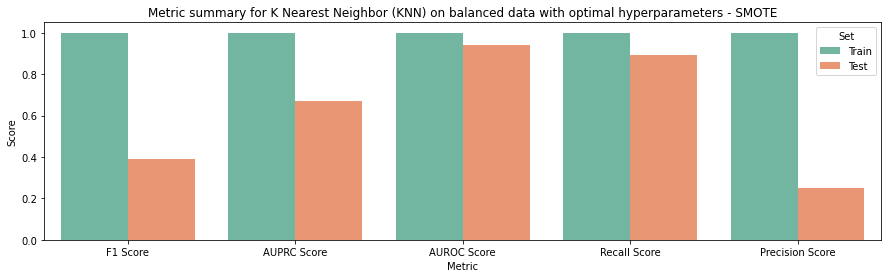

In [172]:
metric_plot(df,'Metric summary for K Nearest Neighbor (KNN) on balanced data with optimal hyperparameters - SMOTE')

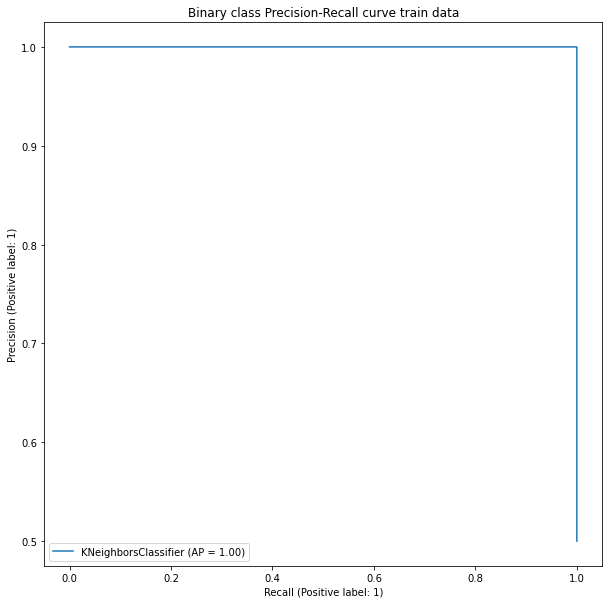

In [135]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelKNN_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


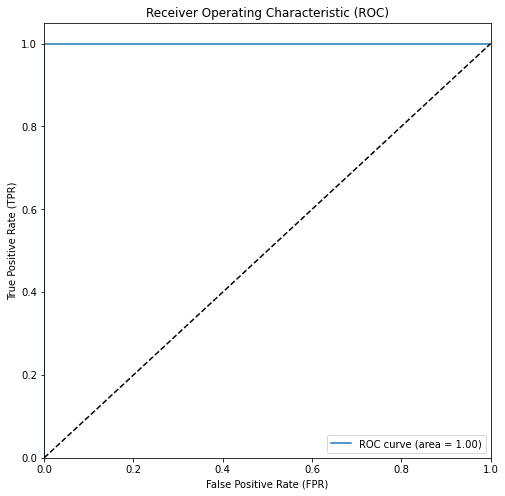

In [136]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

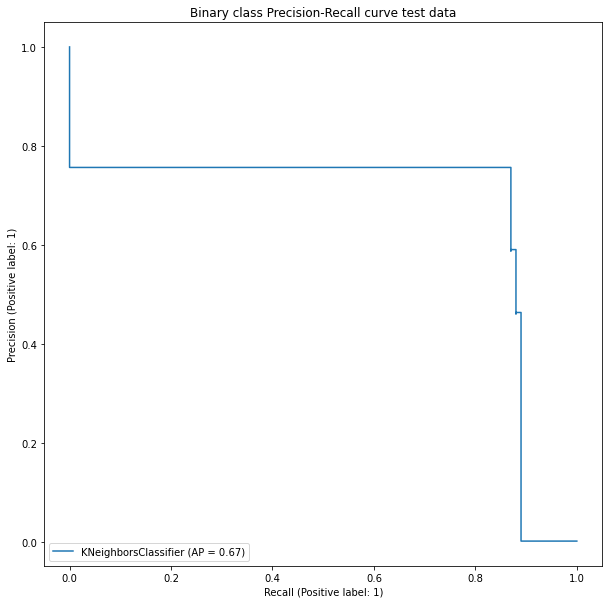

In [137]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelKNN_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


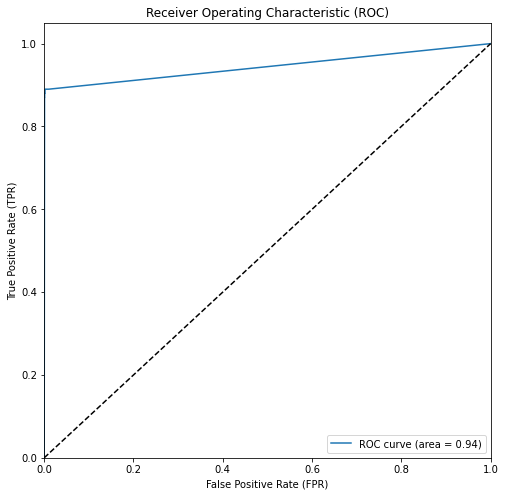

In [138]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 3.6 : Support Vector Machine (SVM)
- Balanced Data - Using SMOTE

In [139]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = [ {'gamma': [0.1, 0.01, 0.001],
                     'C': [1, 10, 100, 1000]}]

# specify model with RBF kernel
model = SVC(kernel="rbf",random_state = 7)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelSVC_CV_sm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelSVC_CV_sm.fit(X_train_smote, y_train_smote)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelSVC_CV_sm.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelSVC_CV_sm.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
---Time taken 12641.941109657288 seconds ---
Best Average Precision score:  0.9999858997346539
Best hyperparameters:  {'C': 1, 'gamma': 0.1}


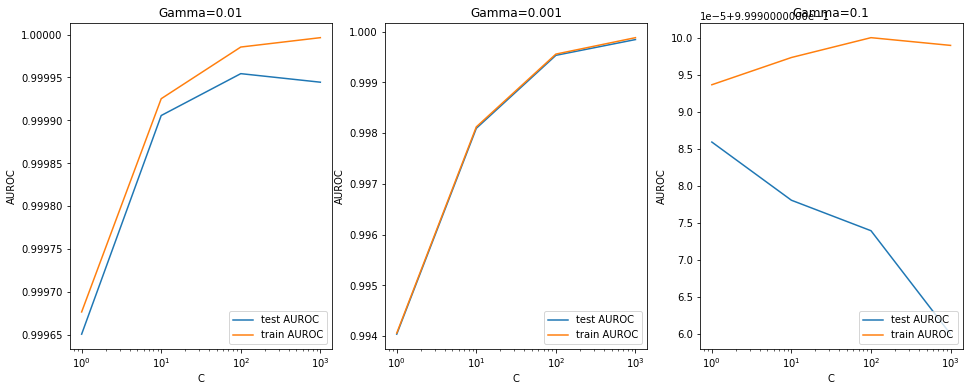

In [140]:
cv_results = pd.DataFrame(ModelSVC_CV_sm.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.01")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.001")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.1")
#plt.ylim([0.99, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

#### SVM using Optimal values of hyperparameter (kernel = rbf):
- C: 1
- Gamma: 0.1

In [141]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelSVM_sm = SVC(kernel="rbf", C= 1, gamma = 0.1, random_state = 7,probability=True)
ModelSVM_sm.fit(X_train_smote, y_train_smote)
# Prediction on training data
y_train_pred = ModelSVM_sm.predict(X_train_smote)
y_train_pred_proba = ModelSVM_sm.predict_proba(X_train_smote)[:,1]
#Prediction on test data
y_test_pred = ModelSVM_sm.predict(X_test)
y_test_pred_proba = ModelSVM_sm.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 24494.467005968094 seconds ---


In [142]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_smote, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_smote, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_smote, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_smote, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_smote, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_smote, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227453

    accuracy                           1.00    454906
   macro avg       1.00      1.00      1.00    454906
weighted avg       1.00      1.00      1.00    454906

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.57      0.55      0.56       100

    accuracy                           1.00     56962
   macro avg      

In [173]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.56],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.45],['AUROC Score','Train',1.0],['AUROC Score','Test',0.78],['Recall Score','Train',1.0],['Recall Score','Test',0.55],['Precision Score','Train',1.0],['Precision Score','Test',0.57]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

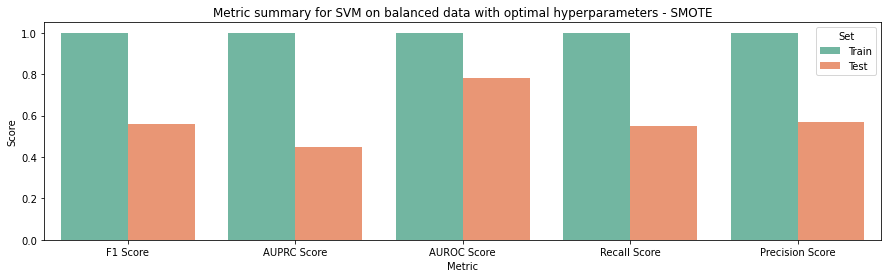

In [174]:
metric_plot(df,'Metric summary for SVM on balanced data with optimal hyperparameters - SMOTE')

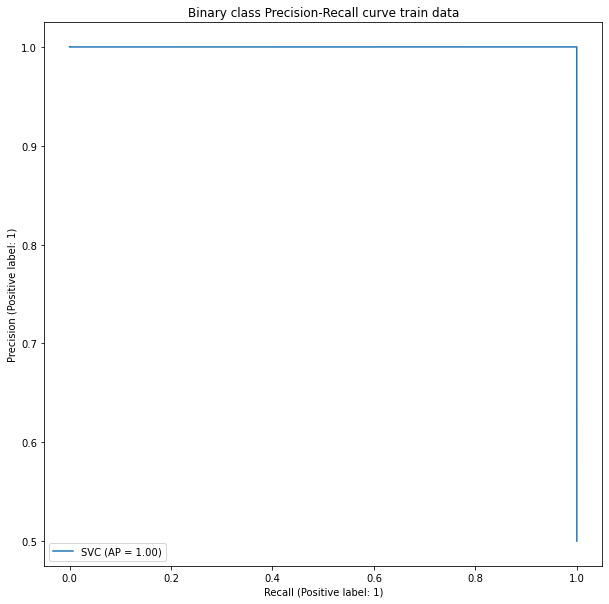

In [143]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelSVM_sm, X_train_smote, y_train_smote)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


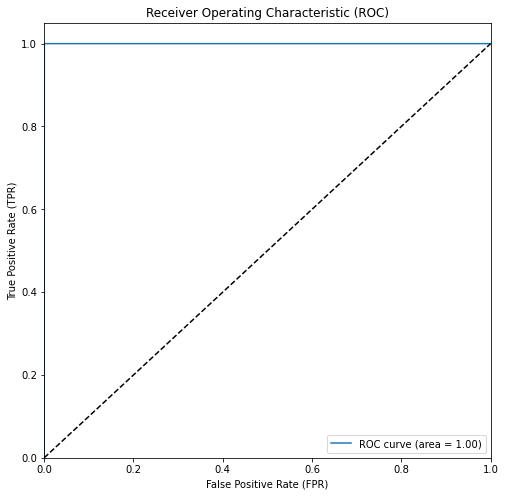

In [144]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_smote,y_train_pred_proba)

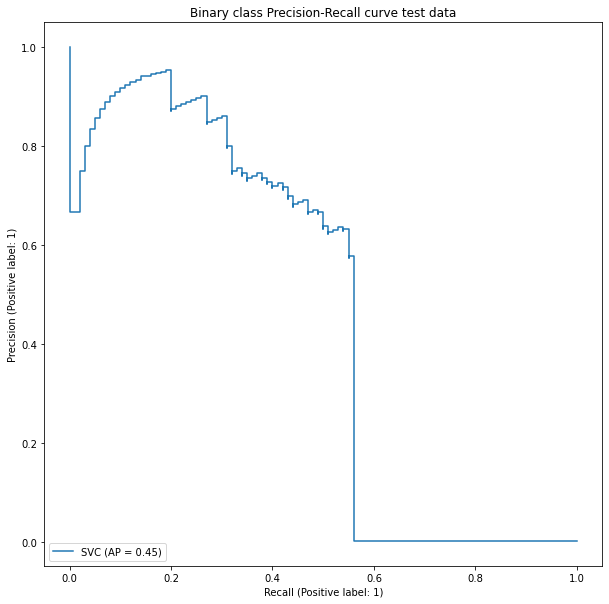

In [145]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelSVM_sm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


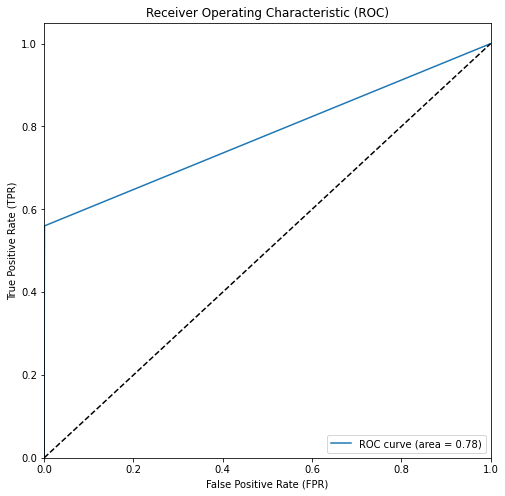

In [146]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

In [84]:
data = [['Logistic Regression','F1 Score',0.10],['Logistic Regression','AUROC Score',0.98],['Logistic Regression','AUPRC Score',0.78],['Logistic Regression','Precision Score',0.05],['Logistic Regression','Recall Score',0.91],
       ['Decision Tree','F1 Score',0.19],['Decision Tree','AUROC Score',0.91],['Decision Tree','AUPRC Score',0.63],['Decision Tree','Precision Score',0.11],['Decision Tree','Recall Score',0.87],
       ['Random Forest','F1 Score',0.74],['Random Forest','AUROC Score',0.98],['Random Forest','AUPRC Score',0.86],['Random Forest','Precision Score',0.65],['Random Forest','Recall Score',0.87],
       ['XGBoost','F1 Score',0.72],['XGBoost','AUROC Score',0.99],['XGBoost','AUPRC Score',0.86],['XGBoost','Precision Score',0.62],['XGBoost','Recall Score',0.85],
       ['KNN','F1 Score',0.39],['KNN','AUROC Score',0.94],['KNN','AUPRC Score',0.67],['KNN','Precision Score',0.25],['KNN','Recall Score',0.89],
       ['SVM','F1 Score',0.56],['SVM','AUROC Score',0.78],['SVM','AUPRC Score',0.45],['SVM','Precision Score',0.57],['SVM','Recall Score',0.55]]
df = pd.DataFrame(data, columns = ['Model','Metric', 'Score'])

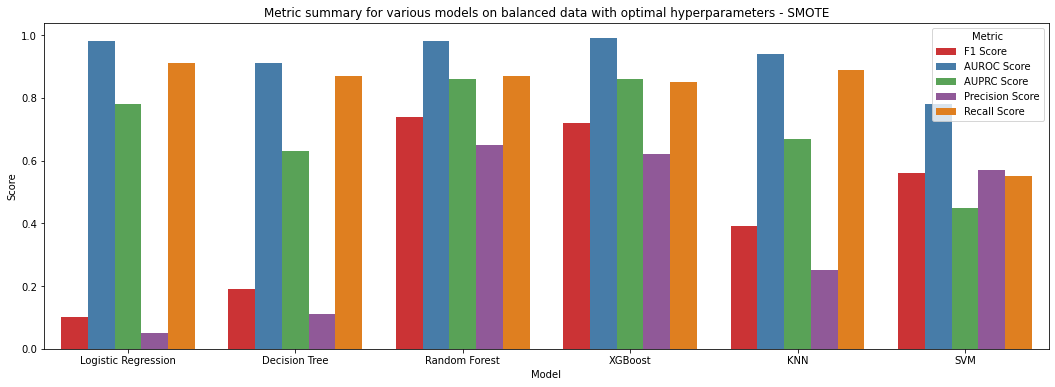

In [85]:
model_perf_plot(df,'Metric summary for various models on balanced data with optimal hyperparameters - SMOTE')

### Observation:

For SMOTE oversampling, we can see that the model XGBoost performs the best with a high score of AUROC value of **99%** with  Recall value of **85%**. This suggests that the model is accurately tracking the fraudulant and non-fraudalant transactions with high accuracy.

##### Build models on other algorithms to see the better performing on SMOTE

### ADASYN

#### This is similar to SMOTE, with a minor change in the generation of synthetic sample points for minority data points. For a particular data point, the number of synthetic samples that it will add will have a density distribution, whereas for SMOTE, the distribution will be uniform. The aim here is to create synthetic data for minority examples that are harder to learn rather than easier ones.

#### Printing the class distribution after applying ADASYN

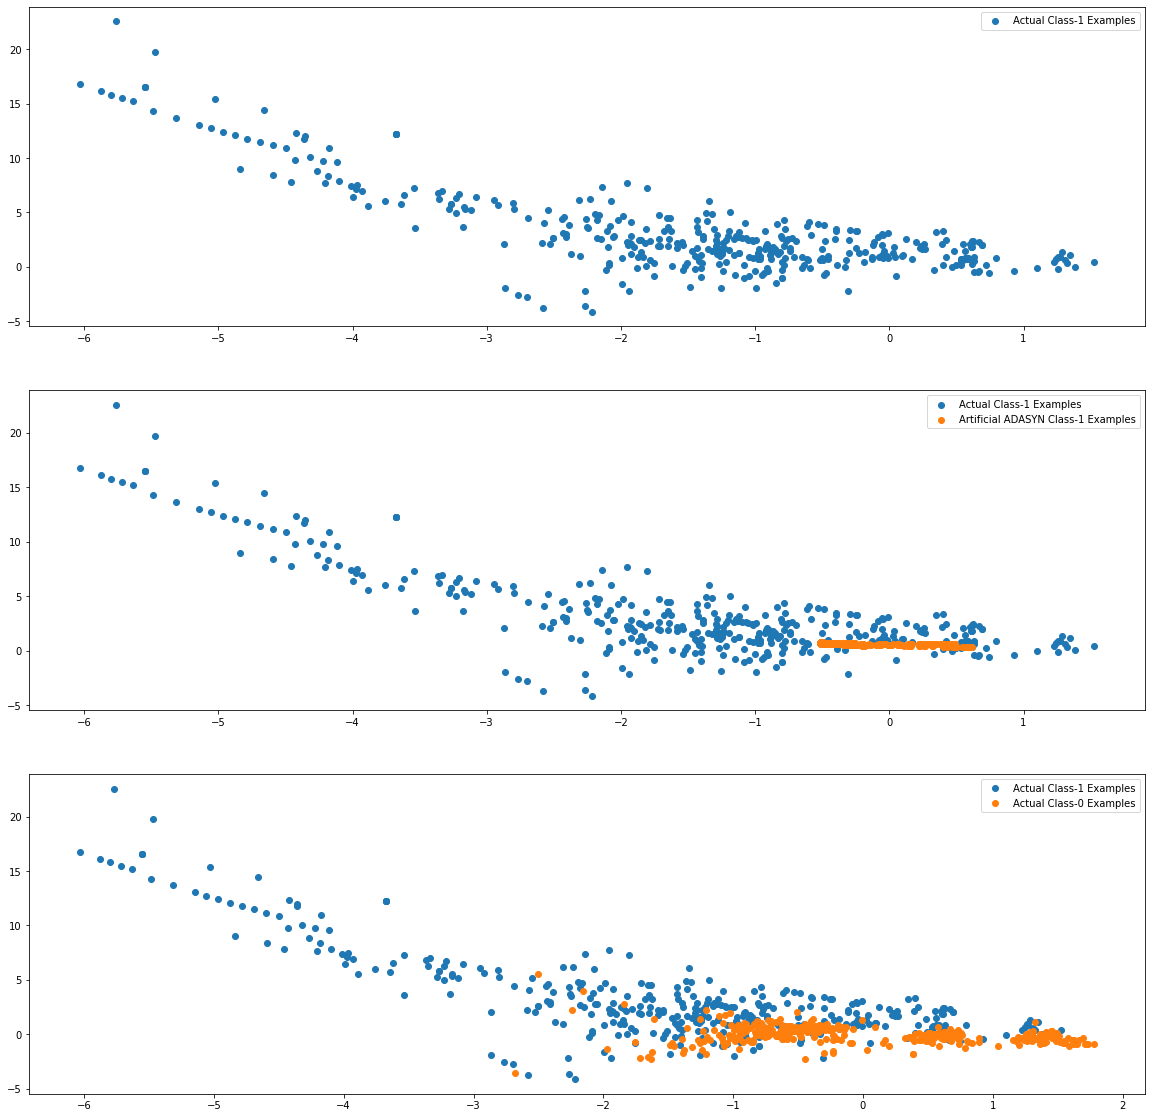

In [28]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state = 7)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
b
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [37]:
plt.rcParams['figure.figsize'] = [6, 6]

In [38]:
# Checking shape of data
print('Before resampling with ADASYN: {}'.format(X_train.shape))
print('After resampling with ADASYN: {}'.format(X_train_adasyn.shape))

print('\nClass Distribution')

# Befor sampling class distribution
print('\nBefore resampling with ADASYN:\n',y_train.value_counts())
# new class distribution 
print('\nAfter resampling with ADASYN:\n',y_train_adasyn.value_counts())

Before resampling with ADASYN: (227845, 29)
After resampling with ADASYN: (454845, 29)

Class Distribution

Before resampling with ADASYN:
 0    227453
1       392
Name: Class, dtype: int64

After resampling with ADASYN:
 0    227453
1    227392
Name: Class, dtype: int64


## Model Building
- Build different models on the balanced dataset and see the result

##### Build models on other algorithms to see the better performing on ADASYN

### Model 4.1 : Logistic Regression 
- Balanced Data - Using ADASYN
- L2 regularization

In [30]:
# Logistic Regression parameters for Stratified K-fold cross vaidation
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1100, 1300, 1500, 2000, 2500]}
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelLR_CV_ads = GridSearchCV(estimator = LogisticRegression(random_state = 7,penalty = 'l2'),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelLR_CV_ads.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best AUROC score: ', ModelLR_CV_ads.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelLR_CV_ads.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
---Time taken 29.142999410629272 seconds ---
Best AUROC score:  0.959910000296028
Best hyperparameters:  {'C': 2000}


In [31]:
# cross validation results
cv_results = pd.DataFrame(ModelLR_CV_ads.cv_results_)

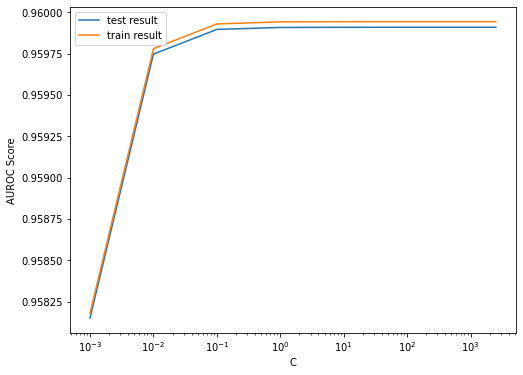

In [32]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('AUROC Score')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression using Optimal values of hyperparameter:
- C: 2000

In [39]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelLR_ada = LogisticRegression(C = 2000,penalty = 'l2',random_state = 7)
ModelLR_ada.fit(X_train_adasyn, y_train_adasyn)
# Prediction on training data
y_train_pred = ModelLR_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelLR_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelLR_ada.predict(X_test)
y_test_pred_proba = ModelLR_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 1.3170063495635986 seconds ---


In [40]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227453
           1       0.91      0.87      0.89    227392

    accuracy                           0.89    454845
   macro avg       0.89      0.89      0.89    454845
weighted avg       0.89      0.89      0.89    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 0.96
F1 Score for train data: 0.89
AUPRC Score for train data: 0.96
Precision Score for train data: 0.91
Recall Score for train data: 0.87

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56862
           1       0.02      0.96      0.04       100

    accuracy                           0.91     56962
   macro avg      

In [175]:
data = [['F1 Score','Train',0.89],['F1 Score','Test',0.04],['AUPRC Score','Train',0.96],['AUPRC Score','Test',0.77],['AUROC Score','Train',0.96],['AUROC Score','Test',0.98],['Recall Score','Train',0.87],['Recall Score','Test',0.96],['Precision Score','Train',0.91],['Precision Score','Test',0.02]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

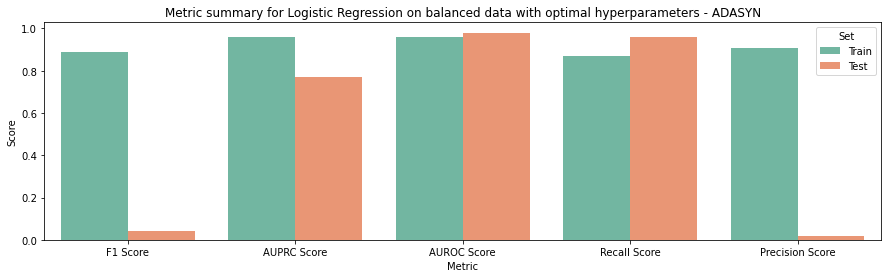

In [176]:
metric_plot(df,'Metric summary for Logistic Regression on balanced data with optimal hyperparameters - ADASYN')

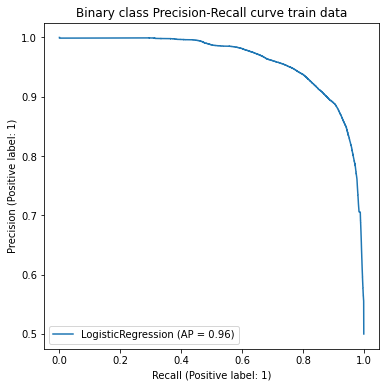

In [41]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelLR_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


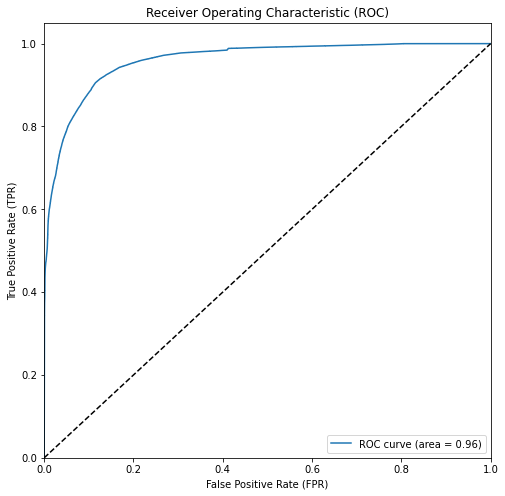

In [42]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

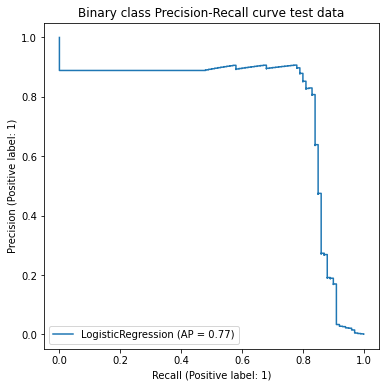

In [43]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelLR_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


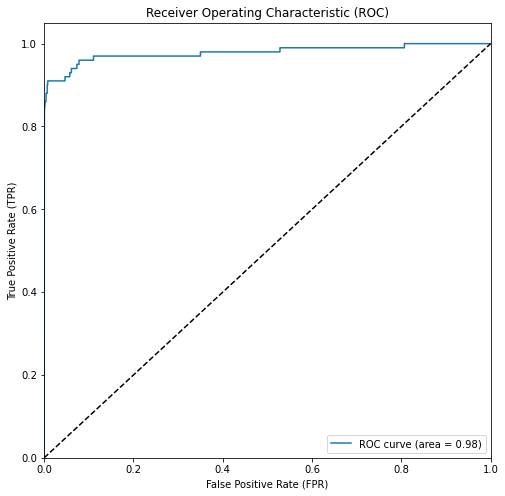

In [44]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 4.2 : Decision Tree
- Balanced Data - Using ADASYN

In [39]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 60, 20),
    'min_samples_split': range(20, 150, 10),
    'splitter':['best', 'random']
}

model = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelDT_CV_ada = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelDT_CV_ada.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelDT_CV_ada.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelDT_CV_ada.best_params_)

Fitting 3 folds for each of 104 candidates, totalling 312 fits
---Time taken 198.04213309288025 seconds ---
Best Average Precision score:  0.9917327041077059
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50, 'splitter': 'best'}


#### Decision Tree using Optimal values of hyperparameter:
- Max depth: 10
- Min samples leaf: 20
- Min samples Split: 50
- Splitter: best

In [45]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelDT_ada = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 20, min_samples_split= 50, splitter= 'best', random_state = 7)
ModelDT_ada.fit(X_train_adasyn, y_train_adasyn)
# Prediction on training data
y_train_pred = ModelDT_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelDT_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelDT_ada.predict(X_test)
y_test_pred_proba = ModelDT_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 15.653053998947144 seconds ---


In [46]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    227453
           1       0.96      0.99      0.98    227392

    accuracy                           0.98    454845
   macro avg       0.98      0.98      0.98    454845
weighted avg       0.98      0.98      0.98    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 0.99
F1 Score for train data: 0.98
AUPRC Score for train data: 0.99
Precision Score for train data: 0.96
Recall Score for train data: 0.99

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.88      0.07       100

    accuracy                           0.96     56962
   macro avg      

In [177]:
data = [['F1 Score','Train',0.98],['F1 Score','Test',0.07],['AUPRC Score','Train',0.99],['AUPRC Score','Test',0.28],['AUROC Score','Train',0.99],['AUROC Score','Test',0.94],['Recall Score','Train',0.99],['Recall Score','Test',0.88],['Precision Score','Train',0.96],['Precision Score','Test',0.04]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

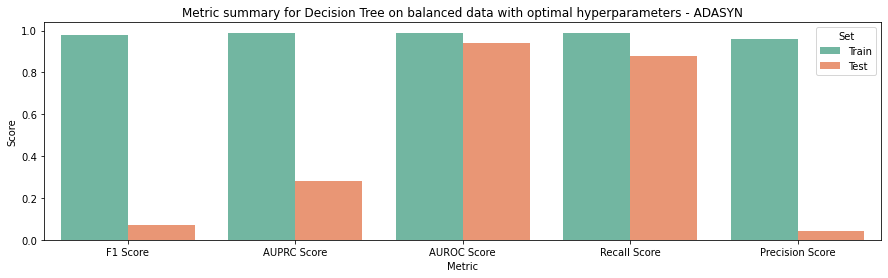

In [178]:
metric_plot(df,'Metric summary for Decision Tree on balanced data with optimal hyperparameters - ADASYN')

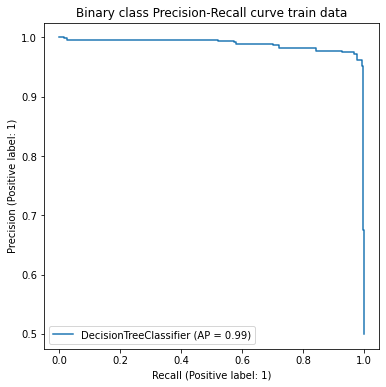

In [47]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelDT_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


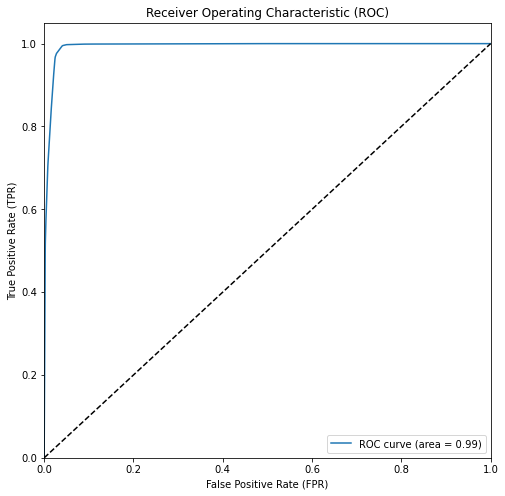

In [48]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

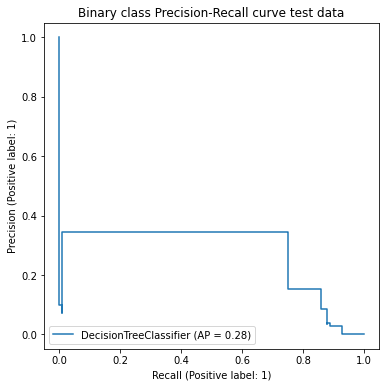

In [49]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelDT_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


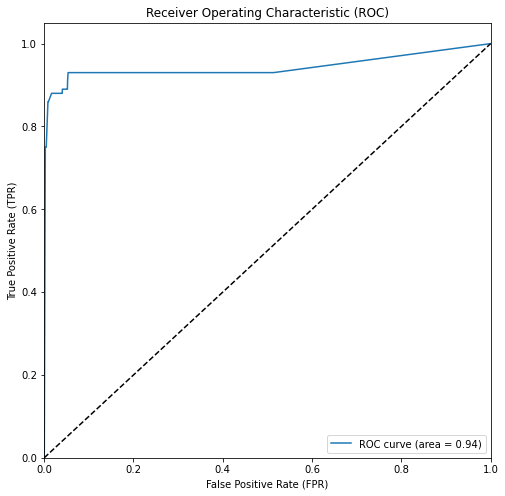

In [50]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 4.3 : Random Forest
- Balanced Data - Using ADASYN

In [46]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'n_estimators': range(100, 300, 100),
    'max_depth': range(6, 14, 2),
    'min_samples_leaf': range(20, 40, 10),
    'min_samples_split': range(20, 40, 10),
}


model = RandomForestClassifier()
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelRF_CV_ada = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelRF_CV_ada.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelRF_CV_ada.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelRF_CV_ada.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
---Time taken 2538.387182235718 seconds ---
Best Average Precision score:  0.9998748095371822
Best hyperparameters:  {'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 100}


#### Random Forest using Optimal values of hyperparameter:
- Max depth: 12
- Min sample leaf: 20
- Min sample split: 30
- Number of estimators: 100

In [51]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelRF_ada = RandomForestClassifier(max_depth= 12, min_samples_leaf= 20, min_samples_split= 30, n_estimators= 100, random_state = 7)
ModelRF_ada.fit(X_train_adasyn, y_train_adasyn)
# Prediction on training data
y_train_pred = ModelRF_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelRF_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelRF_ada.predict(X_test)
y_test_pred_proba = ModelRF_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 226.573011636734 seconds ---


In [52]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227453
           1       0.99      1.00      1.00    227392

    accuracy                           1.00    454845
   macro avg       1.00      1.00      1.00    454845
weighted avg       1.00      1.00      1.00    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 0.99
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.20      0.87      0.32       100

    accuracy                           0.99     56962
   macro avg      

In [179]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.32],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.78],['AUROC Score','Train',1.0],['AUROC Score','Test',0.99],['Recall Score','Train',1.0],['Recall Score','Test',0.87],['Precision Score','Train',0.99],['Precision Score','Test',0.20]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

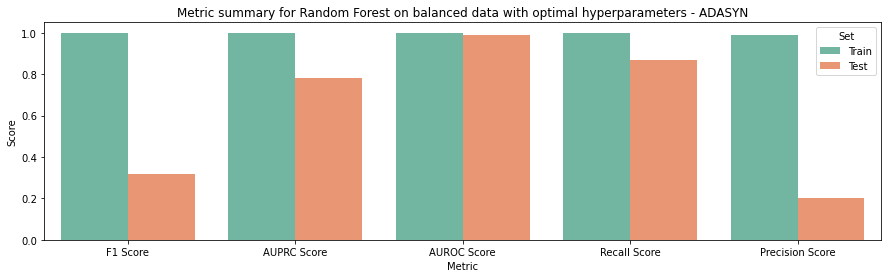

In [180]:
metric_plot(df,'Metric summary for Random Forest on balanced data with optimal hyperparameters - ADASYN')

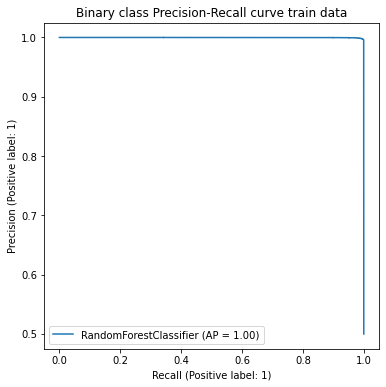

In [53]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelRF_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


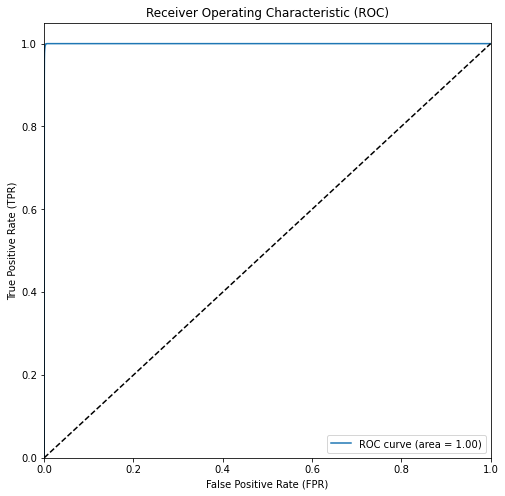

In [54]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

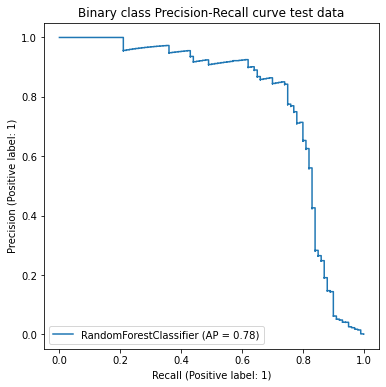

In [55]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelRF_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


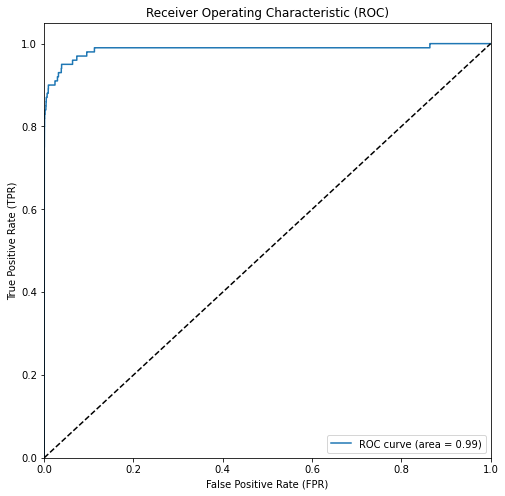

In [56]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 4.4 : XGBoost
- Balanced Data - Using ADASYN

In [30]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = {
    'learning_rate': [0.1, 0.6],
    'max_depth': range (8, 12, 2),
    'subsample': [0.5, 0.75, 1]
}


model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic',
    nthread=4)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelXG_CV_ada = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelXG_CV_ada.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelXG_CV_ada.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelXG_CV_ada.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
---Time taken 109.70071363449097 seconds ---
Best Average Precision score:  0.9999899795716519
Best hyperparameters:  {'learning_rate': 0.6, 'max_depth': 8, 'subsample': 0.5}


#### XGBoost using Optimal values of hyperparameter:
- Learning rate: 0.6
- Max Depth: 8
- Subsample: 0.5

In [57]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelXG_ada = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state = 7, objective= 'binary:logistic',
    nthread=4, learning_rate= 0.6, max_depth= 8, subsample= 0.5)
ModelXG_ada.fit(X_train_adasyn, y_train_adasyn)
# Prediction on training data
y_train_pred = ModelXG_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelXG_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelXG_ada.predict(X_test)
y_test_pred_proba = ModelXG_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 2.4930944442749023 seconds ---


In [58]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227392

    accuracy                           1.00    454845
   macro avg       1.00      1.00      1.00    454845
weighted avg       1.00      1.00      1.00    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.71      0.84      0.77       100

    accuracy                           1.00     56962
   macro avg      

In [181]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.77],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.85],['AUROC Score','Train',1.0],['AUROC Score','Test',0.99],['Recall Score','Train',1.0],['Recall Score','Test',0.84],['Precision Score','Train',1.0],['Precision Score','Test',0.71]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

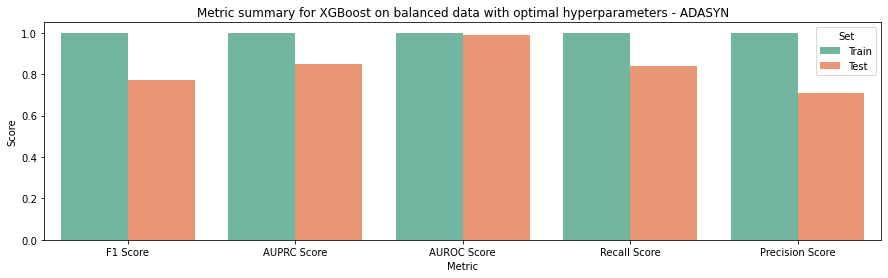

In [182]:
metric_plot(df,'Metric summary for XGBoost on balanced data with optimal hyperparameters - ADASYN')

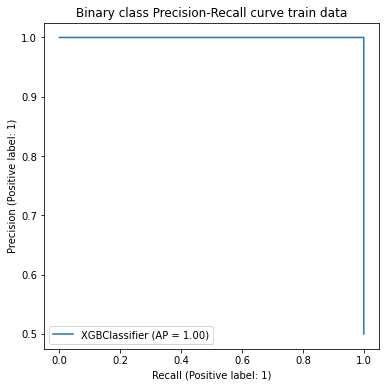

In [59]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelXG_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


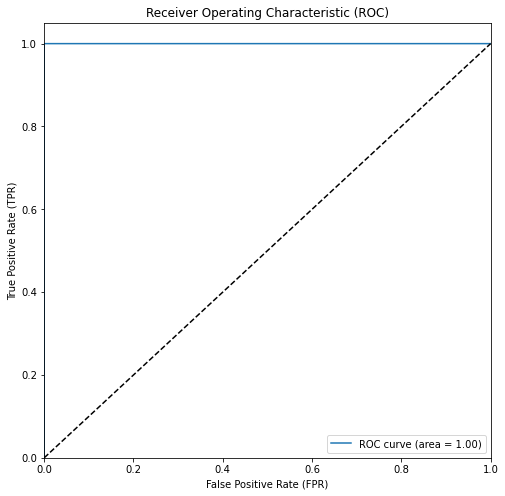

In [60]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

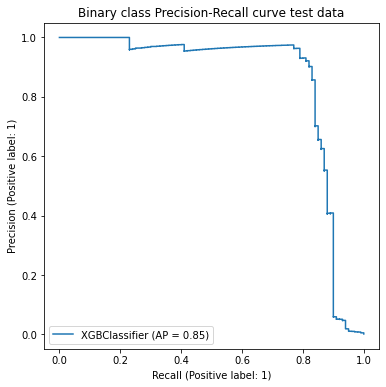

In [61]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelXG_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


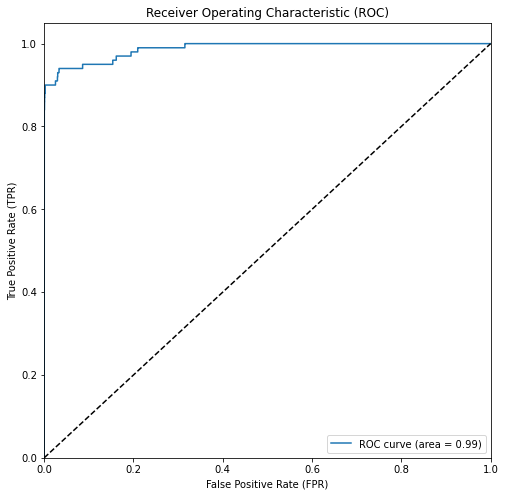

In [62]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 4.5 : K Nearest Neighbor (KNN) 
- Balanced Data - Using ADASYN

In [161]:
# KNN parameters for Stratified K-fold cross vaidation
estimator_KNN = KNeighborsClassifier(metric='minkowski',weights='distance')
parameters_KNN = {
    'n_neighbors': list(range(2,12,2)),
}

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)

start_time = time.time()
#perform cross validation
ModelKNN_CV_ada = GridSearchCV(estimator = estimator_KNN,
                        param_grid = parameters_KNN, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
ModelKNN_CV_ada.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelKNN_CV_ada.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelKNN_CV_ada.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
---Time taken 1614.52969288826 seconds ---
Best Average Precision score:  0.9995757290240328
Best hyperparameters:  {'n_neighbors': 8}


#### K Nearest Neighbor (KNN) using Optimal values of hyperparameter:
- Number of neighbours = 8

In [63]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelKNN_ada = KNeighborsClassifier(n_neighbors = 8,metric='minkowski',weights='distance')
ModelKNN_ada.fit(X_train_adasyn, y_train_adasyn)

# Prediction on training data
y_train_pred = ModelKNN_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelKNN_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelKNN_ada.predict(X_test)
y_test_pred_proba = ModelKNN_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 314.0348598957062 seconds ---


In [64]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227392

    accuracy                           1.00    454845
   macro avg       1.00      1.00      1.00    454845
weighted avg       1.00      1.00      1.00    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.43      0.89      0.58       100

    accuracy                           1.00     56962
   macro avg      

In [183]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.58],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.63],['AUROC Score','Train',1.0],['AUROC Score','Test',0.94],['Recall Score','Train',1.0],['Recall Score','Test',0.89],['Precision Score','Train',1.0],['Precision Score','Test',0.43]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

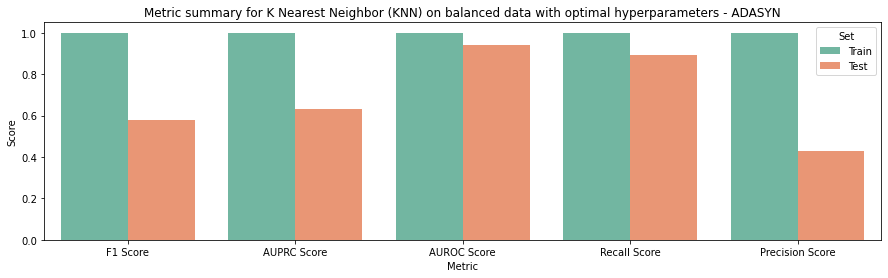

In [184]:
metric_plot(df,'Metric summary for K Nearest Neighbor (KNN) on balanced data with optimal hyperparameters - ADASYN')

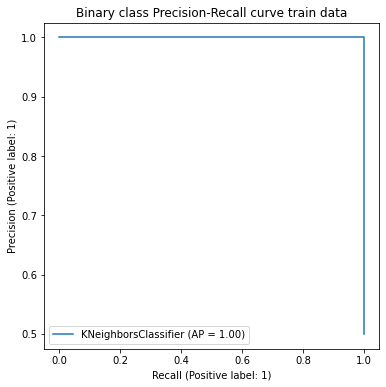

In [65]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelKNN_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


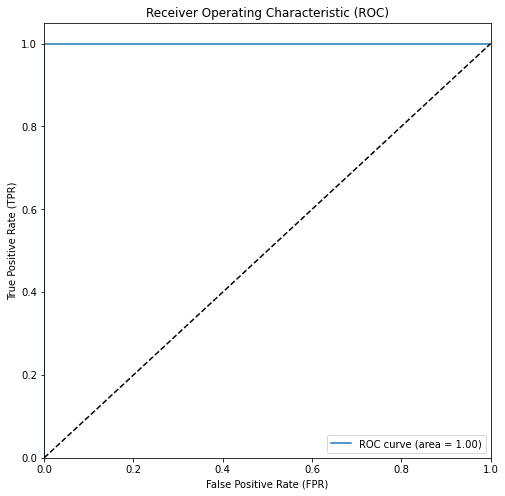

In [66]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

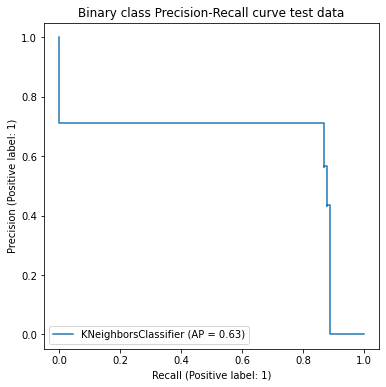

In [67]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelKNN_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


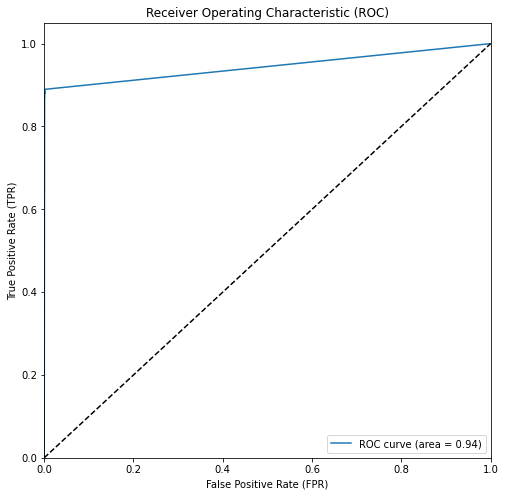

In [68]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

### Model 4.6 : Suport Vector Machine (SVM)
- Balanced Data - Using ADASYN

In [151]:
# specify range of hyperparameters
start_time = time.time()
hyper_params = [ {'gamma': [0.1, 0.01, 0.001],
                     'C': [1, 10, 100, 1000]}]

# specify model with RBF kernel
model = SVC(kernel="rbf",random_state = 7)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 7)
# set up GridSearchCV()
ModelSVC_CV_ada = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

#perform hyperparameter tuning
ModelSVC_CV_ada.fit(X_train_adasyn, y_train_adasyn)
print("---Time taken %s seconds ---" % (time.time() - start_time))
#print the evaluation result by choosing a evaluation metric
print('Best Average Precision score: ', ModelSVC_CV_ada.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', ModelSVC_CV_ada.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
---Time taken 17247.108909130096 seconds ---
Best Average Precision score:  0.9999805682383301
Best hyperparameters:  {'C': 1, 'gamma': 0.1}


In [152]:
cv_results = pd.DataFrame(ModelSVC_CV_ada.cv_results_)

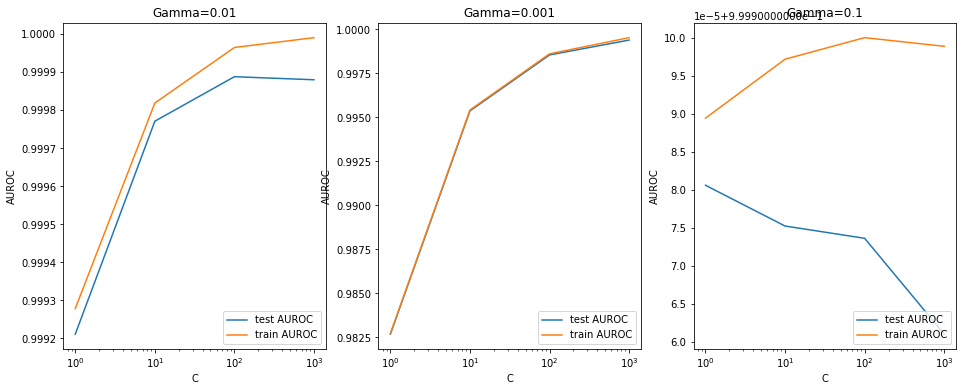

In [153]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.01")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.001")
#plt.ylim([0.98, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUROC')
plt.title("Gamma=0.1")
#plt.ylim([0.99, 1])
plt.legend(['test AUROC', 'train AUROC'], loc='lower right')
plt.xscale('log')

#### SVM using Optimal values of hyperparameter (kernel = rbf):
- C: 1
- Gamma: 0.1

In [154]:
# Training model with optimal hyperparameters
start_time = time.time()
ModelSVM_ada = SVC(kernel="rbf", C = 1, gamma = 0.1, random_state = 7,probability=True)
ModelSVM_ada.fit(X_train_adasyn, y_train_adasyn)
# Prediction on training data
y_train_pred = ModelSVM_ada.predict(X_train_adasyn)
y_train_pred_proba = ModelSVM_ada.predict_proba(X_train_adasyn)[:,1]
#Prediction on test data
y_test_pred = ModelSVM_ada.predict(X_test)
y_test_pred_proba = ModelSVM_ada.predict_proba(X_test)[:,1]
print("---Time taken %s seconds ---" % (time.time() - start_time))

---Time taken 21653.125121355057 seconds ---


In [156]:
# Model evaluation
print('Train data classification report:')
print(classification_report(y_train_adasyn, y_train_pred))
print('-'*100)
print('AUROC Score for train data: %0.2f'%roc_auc_score(y_train_adasyn, y_train_pred_proba))
print('F1 Score for train data: %0.2f'%f1_score(y_train_adasyn, y_train_pred))
print('AUPRC Score for train data: %0.2f'%average_precision_score(y_train_adasyn, y_train_pred_proba))
print('Precision Score for train data: %0.2f'%precision_score(y_train_adasyn, y_train_pred))
print('Recall Score for train data: %0.2f'%recall_score(y_train_adasyn, y_train_pred))
print('') 
print('*'*100)
print('Test data classification report:')
print(classification_report(y_test, y_test_pred))
print('-'*100)
print('AUROC Score for test data: %0.2f'%roc_auc_score(y_test, y_test_pred_proba))
print('F1 Score for test data: %0.2f'%f1_score(y_test, y_test_pred))
print('AUPRC Score for test data: %0.2f'%average_precision_score(y_test, y_test_pred_proba))
print('Precision Score for test data: %0.2f'%precision_score(y_test, y_test_pred))
print('Recall Score for test data: %0.2f'%recall_score(y_test, y_test_pred))

Train data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227453
           1       1.00      1.00      1.00    227392

    accuracy                           1.00    454845
   macro avg       1.00      1.00      1.00    454845
weighted avg       1.00      1.00      1.00    454845

----------------------------------------------------------------------------------------------------
AUROC Score for train data: 1.00
F1 Score for train data: 1.00
AUPRC Score for train data: 1.00
Precision Score for train data: 1.00
Recall Score for train data: 1.00

****************************************************************************************************
Test data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.54      0.49      0.52       100

    accuracy                           1.00     56962
   macro avg      

In [185]:
data = [['F1 Score','Train',1.0],['F1 Score','Test',0.52],['AUPRC Score','Train',1.0],['AUPRC Score','Test',0.51],['AUROC Score','Train',1.0],['AUROC Score','Test',0.97],['Recall Score','Train',1.0],['Recall Score','Test',0.49],['Precision Score','Train',1.0],['Precision Score','Test',0.54]]
df = pd.DataFrame(data, columns = ['Metric','Set', 'Score'])

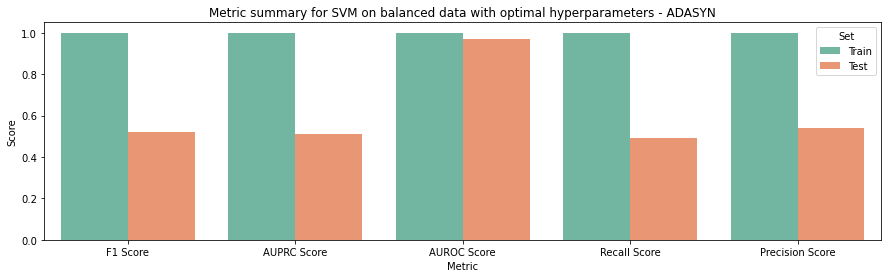

In [186]:
metric_plot(df,'Metric summary for SVM on balanced data with optimal hyperparameters - ADASYN')

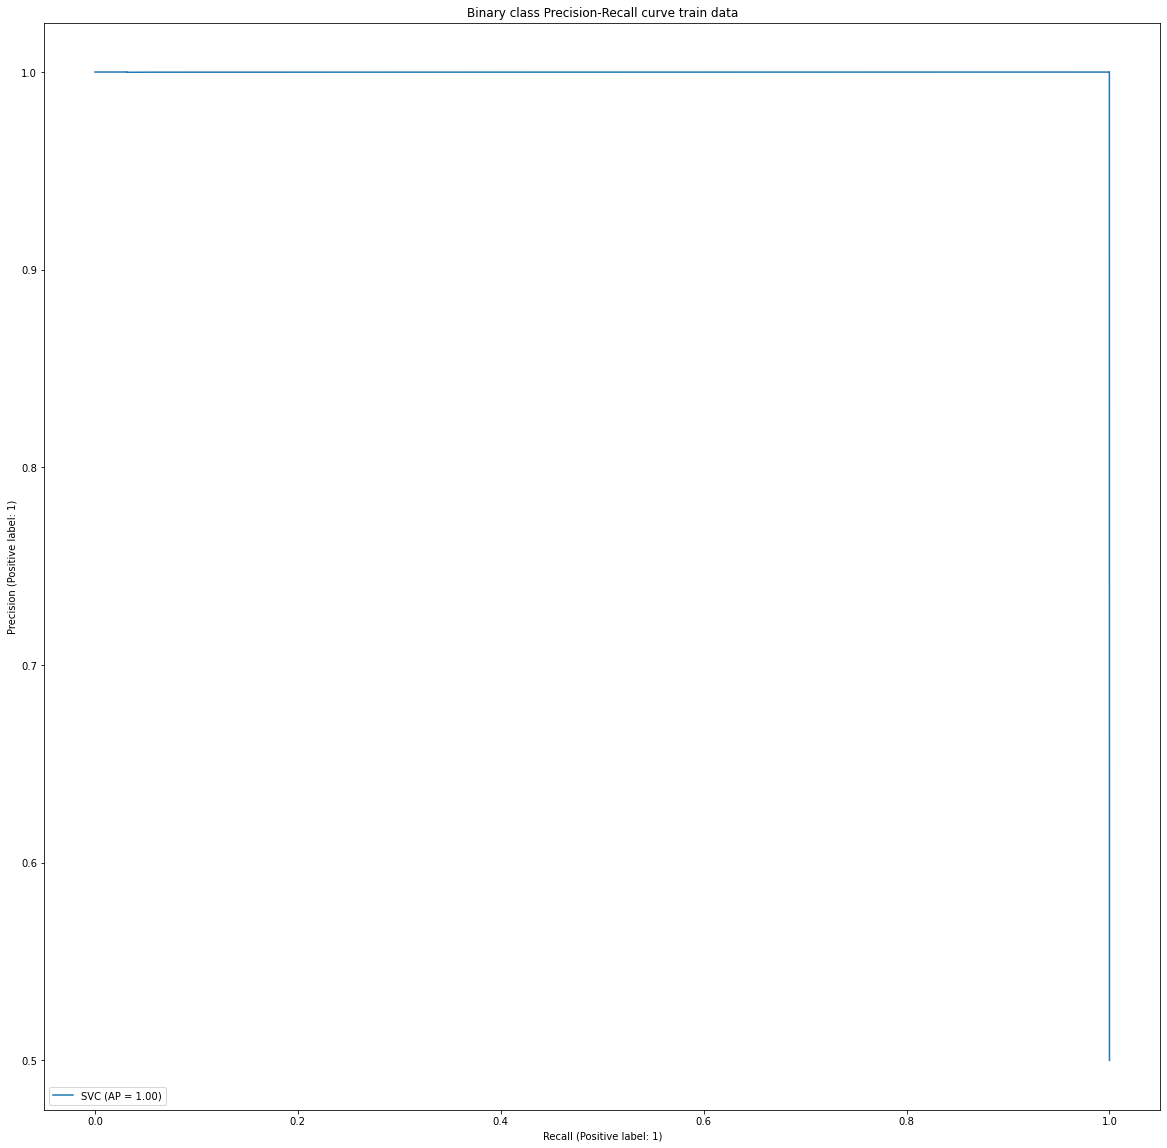

In [157]:
# Plot precision - recall curve train data
disp = plot_precision_recall_curve(ModelSVM_ada, X_train_adasyn, y_train_adasyn)
disp.ax_.set_title('Binary class Precision-Recall curve train data')
plt.show()

ROC train data


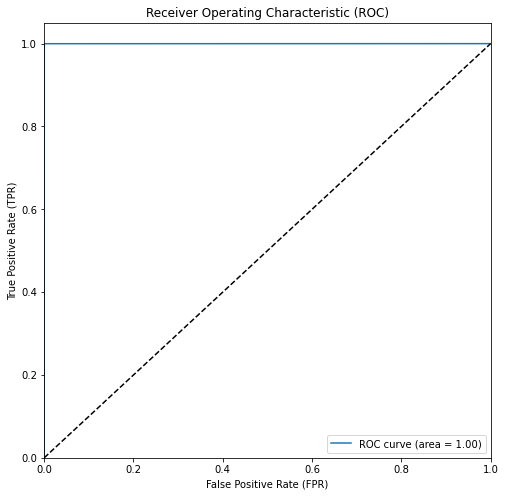

In [158]:
# plot roc curve train data
print('ROC train data')
roc_plot(y_train_adasyn,y_train_pred_proba)

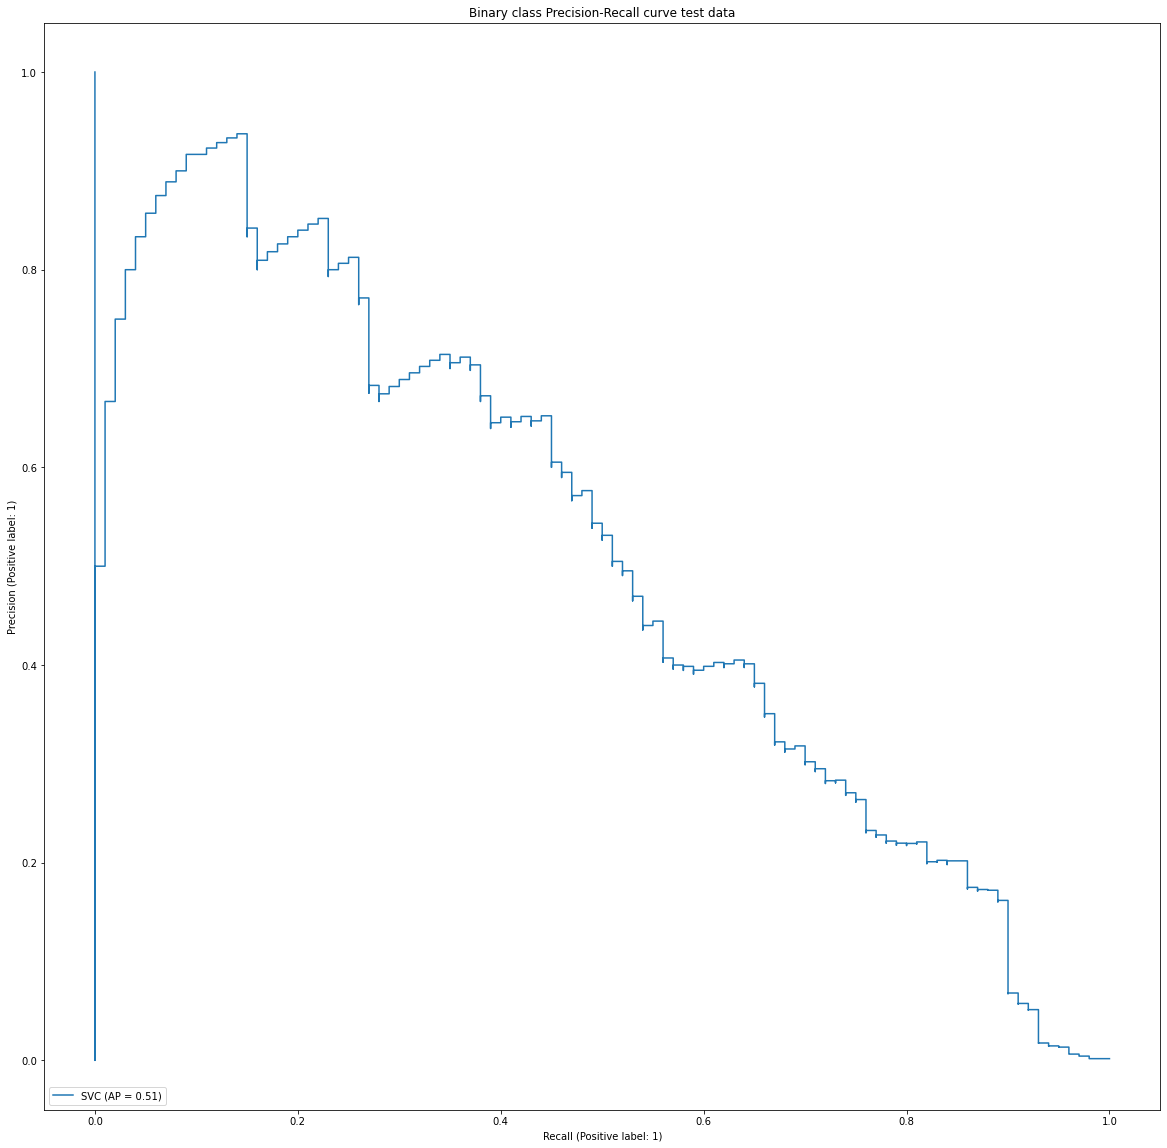

In [159]:
# Plot precision - recall curve test data
disp = plot_precision_recall_curve(ModelSVM_ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve test data')
plt.show()

ROC test data


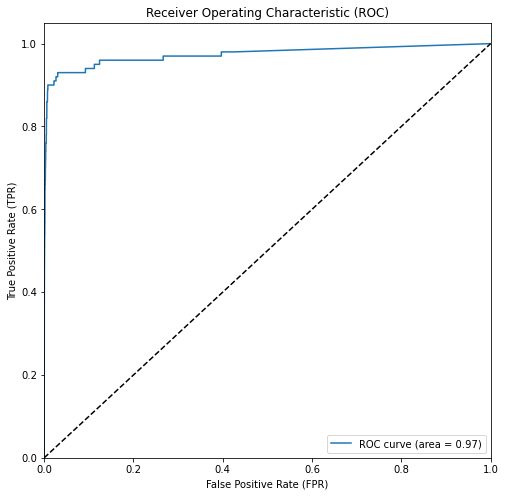

In [160]:
# plot roc curve test data
print('ROC test data')
roc_plot(y_test,y_test_pred_proba)

In [201]:
data = [['Logistic Regression','F1 Score',0.04],['Logistic Regression','AUROC Score',0.98],['Logistic Regression','AUPRC Score',0.77],['Logistic Regression','Precision Score',0.02],['Logistic Regression','Recall Score',0.96],
       ['Decision Tree','F1 Score',0.07],['Decision Tree','AUROC Score',0.94],['Decision Tree','AUPRC Score',0.28],['Decision Tree','Precision Score',0.04],['Decision Tree','Recall Score',0.88],
       ['Random Forest','F1 Score',0.32],['Random Forest','AUROC Score',0.99],['Random Forest','AUPRC Score',0.78],['Random Forest','Precision Score',0.20],['Random Forest','Recall Score',0.87],
       ['XGBoost','F1 Score',0.77],['XGBoost','AUROC Score',0.99],['XGBoost','AUPRC Score',0.85],['XGBoost','Precision Score',0.71],['XGBoost','Recall Score',0.84],
       ['KNN','F1 Score',0.58],['KNN','AUROC Score',0.94],['KNN','AUPRC Score',0.63],['KNN','Precision Score',0.43],['KNN','Recall Score',0.89],
       ['SVM','F1 Score',0.52],['SVM','AUROC Score',0.97],['SVM','AUPRC Score',0.51],['SVM','Precision Score',0.54],['SVM','Recall Score',0.49]]
df = pd.DataFrame(data, columns = ['Model','Metric', 'Score'])

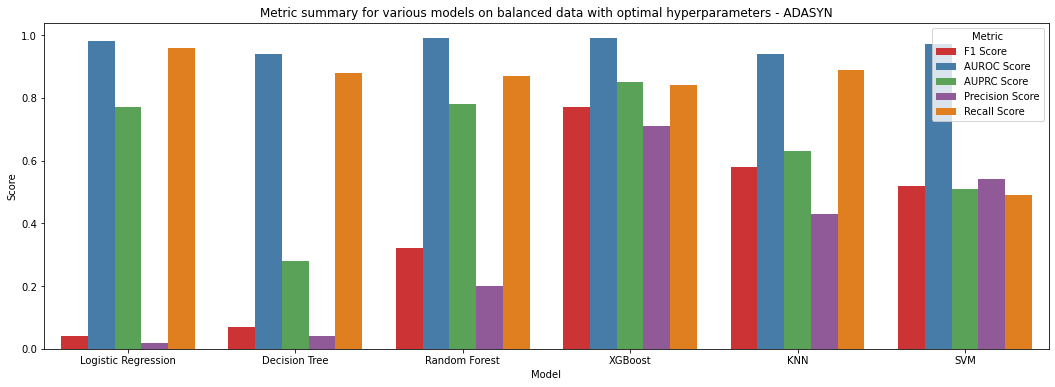

In [202]:
model_perf_plot(df,'Metric summary for various models on balanced data with optimal hyperparameters - ADASYN')

### Observation:

We can see that the AUROC value of XGBoost is again the highest amaong others for ADASYS sampling as well. We noticed a score of **99%** and high values for Precision and recall as well. 

In [53]:
data = [['XGBoost - Imbalanced Dataset',0.85,0.0,0.88,0.0,0.0],['XGBoost - Random Oversampling',0.87,0.99,0.88,0.91,0.86],['XGBoost - SMOTE', 0.86,0.99,0.87,0.86,0.86],['XGBoost - ADASYN',0.77,0.99,0.85,0.71,0.84]]
df = pd.DataFrame(data, columns = ['Model and Dataset','F1 score', 'AUROC score','AUPRC score','Precision score','Recall score'])

<AxesSubplot:xlabel='Model and Dataset'>

<Figure size 432x2160 with 0 Axes>

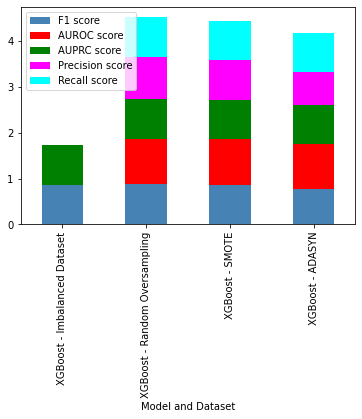

In [55]:
plt.figure(figsize=(6, 30))
df.set_index('Model and Dataset').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','magenta','cyan'])

We can see in the above graph thatXGBoost with Random Oversampling performed the best with very high accuracies on various evaluation metrices starting with AUROC, AUPRC, Precision, Recall.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


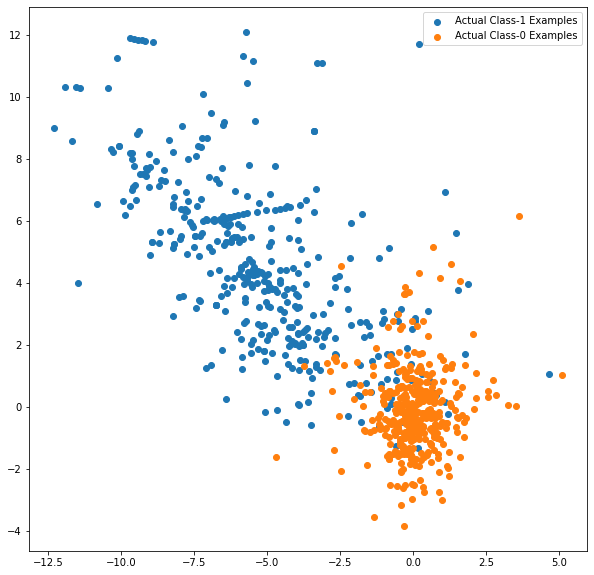

In [77]:
var_imp = []
for i in ModelXG_ada.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(ModelXG_ada.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(ModelXG_ada.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(ModelXG_ada.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(ModelXG_ada.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(ModelXG_ada.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Business Justification:
- I chose AUPRC as the primary evaluation criteria for imbalanced dataset as it takes into consideration the class imbalance in the dataset. 
- I chose AUROC as the primary evaluation criteria for balanced dataset (Balanced by Random oversampling, SMOTE, ADASYN) as it provides good accuracy index in terms of overall performance of the model.
- The best model for imbalanced dataset is the XGBoost with AUROC score of 0.99. I can also see that the Recall and Precision, both are very high as well for XGBoost model which suggests that it can detect good amount of fraudulent transactions as well as more efficient in terms of manual cost that involves in case of fraud evaluation.
- The best oversampling method according to my analysis is Random Oversampling since it provides the highest score for the evaluation metric.
- Although, XGBoost requires more computation and logical processors that can be a critical resource.

In [71]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [48]:
print('Train auc =', roc_auc_score(y_train_os, y_train_pred_proba))
fpr, tpr, thresholds = roc_curve(y_train_os, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.99836713


**Observation:** At 0.998 threshold XGBoost classifier (built on Random oversample balanced dataset) has the highest ROC score with high TPR and low FPR